In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [13]:
import torch 
from torch import nn,optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
target_cols_direction = [
    True, True, True, True, True,
    True, True, True,
    False, True, True, True
]

## 연령대 제한

In [21]:
len(raw)

1227553

In [22]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [23]:
len(raw)

1213899

In [24]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [25]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)',
                '총빌리루빈', '직접빌리루빈', '간접빌리루빈',
                '신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', 'B/C 비율',
               ]

df = raw[cols]

In [26]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율
0,2010,7282,2520,1,42,20,21,63,22,165,1.7,0.3,None,None,1.13,12,None
1,2010,7490,3638,1,39,25,40,164,65,298,0.9,0.3,0.6,None,1.1,14,12.7
2,2010,7915,3997,1,36,19,17,184,66,241,1.4,None,None,None,1.1,14,13
3,2010,8056,4745,1,42,33,39,165,157,315,0.7,0.2,None,108.,0.8,8,10.0
4,2010,8457,3929,1,38,28,18,147,27,350,1.9,None,None,None,1.2,12,10


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   검진년도               1213899 non-null  object
 1   UID                1213899 non-null  int64 
 2   CU_REC_ID          1213899 non-null  int64 
 3   SEX                1213899 non-null  int64 
 4   검진당시나이             1213899 non-null  int64 
 5   AST(SGOT)          1207648 non-null  object
 6   ALT(SGPT)          1205966 non-null  object
 7   ALP                1015782 non-null  object
 8   r-GTP(GGT)         1206247 non-null  object
 9   유산탈수소효소 (LDH)      858854 non-null   object
 10  총빌리루빈              1049384 non-null  object
 11  직접빌리루빈             985030 non-null   object
 12  간접빌리루빈             776312 non-null   object
 13  신사구체여과율 (GFR)      1018437 non-null  object
 14  크레아티닌(Creatinine)  1205229 non-null  object
 15  요소질소 (BUN)         1051812 non-null  object
 16  

In [28]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'AST(SGOT)', 'ALT(SGPT)',
       'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', '총빌리루빈', '직접빌리루빈', '간접빌리루빈',
       '신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', 'B/C 비율'],
      dtype='object')

In [29]:
# df.columns = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체중', '신장', '허리둘레', '체질량지수', 
#              '갑상선자극호르몬', 'Free T4'
#              ]

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [30]:
numeric_col = df.columns

In [31]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   검진년도               1213899 non-null  int64  
 1   UID                1213899 non-null  int64  
 2   CU_REC_ID          1213899 non-null  int64  
 3   SEX                1213899 non-null  int64  
 4   검진당시나이             1213899 non-null  int64  
 5   AST(SGOT)          1206914 non-null  float64
 6   ALT(SGPT)          1204975 non-null  float64
 7   ALP                1014963 non-null  float64
 8   r-GTP(GGT)         1205357 non-null  float64
 9   유산탈수소효소 (LDH)      857893 non-null   float64
 10  총빌리루빈              1048488 non-null  float64
 11  직접빌리루빈             982545 non-null   float64
 12  간접빌리루빈             774951 non-null   float64
 13  신사구체여과율 (GFR)      1016570 non-null  float64
 14  크레아티닌(Creatinine)  1204585 non-null  float64
 15  요소질소 (BUN)         1050981 non-n

In [33]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.206914e+06,1.204975e+06,1.014963e+06,1.205357e+06,857893.000000,1.048488e+06,982545.000000,774951.000000,1.016570e+06,1.204585e+06,1.050981e+06,891318.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,2.472999e+01,2.643380e+01,9.654561e+01,3.379699e+01,186.183242,9.519317e-01,0.291530,0.626199,9.580687e+01,9.705935e-01,1.269687e+01,14.902780
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.786992e+01,2.441298e+01,6.404853e+01,4.106240e+01,69.182443,3.560269e+00,1.293952,0.568146,1.989630e+01,6.131171e+00,3.583918e+00,4.554268
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-2.900000e-01,-0.350000,-0.200000,0.000000e+00,0.000000e+00,0.000000e+00,-1.300000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,1.800000e+01,1.400000e+01,5.300000e+01,1.500000e+01,147.000000,6.000000e-01,0.200000,0.400000,8.200000e+01,7.000000e-01,1.030000e+01,12.000000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,2.100000e+01,2.000000e+01,6.800000e+01,2.200000e+01,165.000000,8.000000e-01,0.230000,0.600000,9.400000e+01,9.000000e-01,1.230000e+01,14.100000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,2.700000e+01,3.100000e+01,1.320000e+02,3.800000e+01,193.000000,1.080000e+00,0.300000,0.800000,1.080000e+02,1.000000e+00,1.460000e+01,17.100000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,4.910000e+03,5.229000e+03,6.724000e+03,4.183000e+03,2961.000000,1.553000e+03,547.000000,191.000000,9.870000e+02,3.440000e+03,4.200000e+02,313.000000


In [34]:
df_result = df.copy()

# 이상치 제거

In [35]:
len(df_result)

1213899

In [36]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [37]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [38]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : 4.5 maximum : 40.5
AST(SGOT) : 1213899 / IQR outliers:  81620 / ratio : 0.0672378838766652

minimum : -11.5 maximum : 56.5
ALT(SGPT) : 1213899 / IQR outliers:  81396 / ratio : 0.06705335452125753

minimum : -65.5 maximum : 250.5
ALP : 1213899 / IQR outliers:  27260 / ratio : 0.022456563519699744

minimum : -19.5 maximum : 72.5
r-GTP(GGT) : 1213899 / IQR outliers:  99079 / ratio : 0.08162046430551471

minimum : 78.0 maximum : 262.0
유산탈수소효소 (LDH) : 1213899 / IQR outliers:  110483 / ratio : 0.09101498559600099

minimum : -0.12000000000000022 maximum : 1.8000000000000003
총빌리루빈 : 1213899 / IQR outliers:  28106 / ratio : 0.023153491353069735

minimum : 0.050000000000000044 maximum : 0.44999999999999996
직접빌리루빈 : 1213899 / IQR outliers:  84880 / ratio : 0.06992344503125877

minimum : -0.20000000000000007 maximum : 1.4000000000000001
간접빌리루빈 : 1213899 / IQR outliers:  15652 / ratio : 0.012893988709110066

minimum : 43.0 maximum : 147.0
신사구체여과율 (GFR) : 1213899 / IQR outliers:  16244 / r

In [39]:
target_cols

['AST(SGOT)',
 'ALT(SGPT)',
 'ALP',
 'r-GTP(GGT)',
 '유산탈수소효소 (LDH)',
 '총빌리루빈',
 '직접빌리루빈',
 '간접빌리루빈',
 '신사구체여과율 (GFR)',
 '크레아티닌(Creatinine)',
 '요소질소 (BUN)',
 'B/C 비율']

In [40]:
minimums

[4.5,
 -11.5,
 -65.5,
 -19.5,
 78.0,
 -0.12000000000000022,
 0.050000000000000044,
 -0.20000000000000007,
 43.0,
 0.2499999999999999,
 3.8500000000000023,
 4.349999999999998]

In [41]:
maximums

[40.5,
 56.5,
 250.5,
 72.5,
 262.0,
 1.8000000000000003,
 0.44999999999999996,
 1.4000000000000001,
 147.0,
 1.4500000000000002,
 21.049999999999997,
 24.750000000000004]

In [42]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823765 entries, 0 to 823764
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               823765 non-null  int64  
 1   UID                823765 non-null  int64  
 2   CU_REC_ID          823765 non-null  int64  
 3   SEX                823765 non-null  int64  
 4   검진당시나이             823765 non-null  int64  
 5   AST(SGOT)          816860 non-null  float64
 6   ALT(SGPT)          815349 non-null  float64
 7   ALP                658150 non-null  float64
 8   r-GTP(GGT)         815796 non-null  float64
 9   유산탈수소효소 (LDH)      545253 non-null  float64
 10  총빌리루빈              684494 non-null  float64
 11  직접빌리루빈             639761 non-null  float64
 12  간접빌리루빈             529746 non-null  float64
 13  신사구체여과율 (GFR)      697148 non-null  float64
 14  크레아티닌(Creatinine)  815817 non-null  float64
 15  요소질소 (BUN)         686903 non-null  float64
 16  B/

In [43]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0,1.7,0.3,NaN,NaN,1.13,12.0,NaN
1,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0,1.4,NaN,NaN,NaN,1.10,14.0,13.0
2,2010,15783,1431,1,41,25.0,19.0,40.0,40.0,NaN,0.6,NaN,NaN,NaN,1.10,13.3,12.1
3,2010,15894,2533,2,29,21.0,13.0,104.0,15.0,NaN,0.8,0.2,0.6,NaN,0.60,8.3,14.0
4,2011,117186,8998,1,33,29.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
len(df_result)

823765

In [45]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823765 entries, 0 to 823764
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               823765 non-null  int64  
 1   UID                823765 non-null  int64  
 2   CU_REC_ID          823765 non-null  int64  
 3   SEX                823765 non-null  int64  
 4   검진당시나이             823765 non-null  int64  
 5   AST(SGOT)          816860 non-null  float64
 6   ALT(SGPT)          815349 non-null  float64
 7   ALP                658150 non-null  float64
 8   r-GTP(GGT)         815796 non-null  float64
 9   유산탈수소효소 (LDH)      545253 non-null  float64
 10  총빌리루빈              684494 non-null  float64
 11  직접빌리루빈             639761 non-null  float64
 12  간접빌리루빈             529746 non-null  float64
 13  신사구체여과율 (GFR)      697148 non-null  float64
 14  크레아티닌(Creatinine)  815817 non-null  float64
 15  요소질소 (BUN)         686903 non-null  float64
 16  B/

# target (건강지수) 계산

In [46]:
len(df_result)

823765

## Linear Regression coefficient 계산

In [47]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [48]:
# target_cols

In [49]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [50]:
# df_man[df_man['target'].isna()]

In [51]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [52]:
# df_target = pd.concat([df_man, df_woman])

In [53]:
# len(df_target)

In [54]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [55]:
# len(df_target)

In [56]:
# df_target[df_target['target'].isna()]

In [57]:
# df_target.info()

In [58]:
# df_target.head()

In [59]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [60]:
# len(df_target)

In [61]:
# df_target.describe()

In [62]:
# df_target[df_target['target'] == 50]

In [63]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [64]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [65]:
# len(df_target)

In [66]:
# df_target.head()

In [67]:
# df_target.info()

## gaussian_kde

In [ ]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [68]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0,1.7,0.3,NaN,NaN,1.13,12.0,NaN
1,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0,1.4,NaN,NaN,NaN,1.10,14.0,13.0
2,2010,15783,1431,1,41,25.0,19.0,40.0,40.0,NaN,0.6,NaN,NaN,NaN,1.10,13.3,12.1
3,2010,15894,2533,2,29,21.0,13.0,104.0,15.0,NaN,0.8,0.2,0.6,NaN,0.60,8.3,14.0
4,2011,117186,8998,1,33,29.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
target_cols

['AST(SGOT)',
 'ALT(SGPT)',
 'ALP',
 'r-GTP(GGT)',
 '유산탈수소효소 (LDH)',
 '총빌리루빈',
 '직접빌리루빈',
 '간접빌리루빈',
 '신사구체여과율 (GFR)',
 '크레아티닌(Creatinine)',
 '요소질소 (BUN)',
 'B/C 비율']

In [70]:
len(target_cols)

12

In [71]:
target_cols_direction

[True, True, True, True, True, True, True, True, False, True, True, True]

In [72]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:                
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 2) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
    df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [73]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

1957.73661 sec


In [74]:
df_target['kde_mean'].min()

11.16

In [75]:
df_target['kde_mean'].max()

178.34

In [ ]:
df_target.describe()

In [ ]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=[,
                             'AST(SGOT)_kde',
                             'ALT(SGPT)_kde',
                             'ALP_kde',
                             'r-GTP(GGT)_kde',
                             '유산탈수소효소 (LDH)_kde',
                             '총빌리루빈_kde',
                             '직접빌리루빈_kde',
                             '간접빌리루빈_kde',
                             '신사구체여과율 (GFR)_kde',
                             '크레아티닌(Creatinine)_kde',
                             '요소질소 (BUN)_kde',
                             'B/C 비율_kde'
                          ])

## target Scaling

In [76]:
df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))

In [77]:
df_target['target'] = (df_target['target'] * 100) + 50

In [78]:
df_target['target'] = df_target['target'].round(0)

In [79]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
93,50.0,1
94,53.0,1
90,54.0,3
88,55.0,7
86,56.0,8
85,57.0,9
83,58.0,19
81,59.0,22
80,60.0,27
77,61.0,53


## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

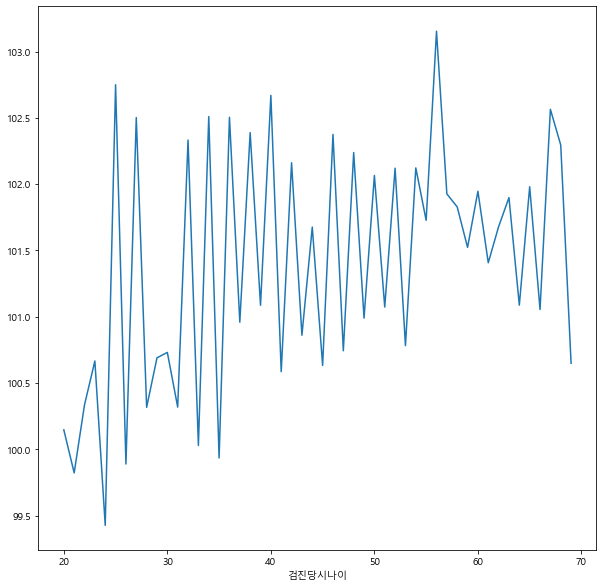

In [80]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

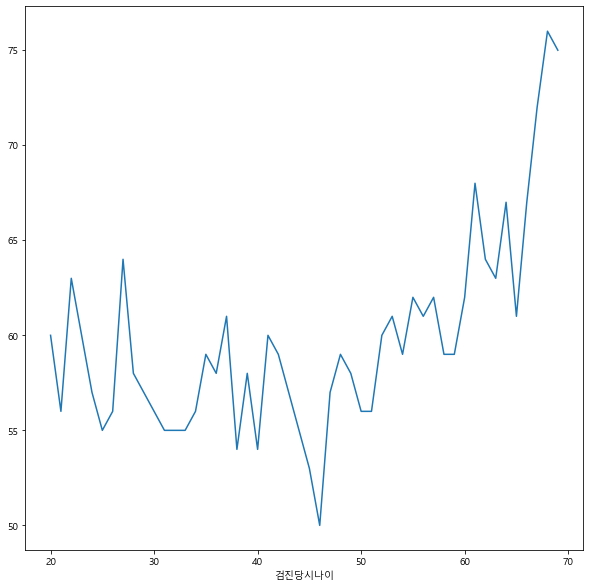

In [81]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

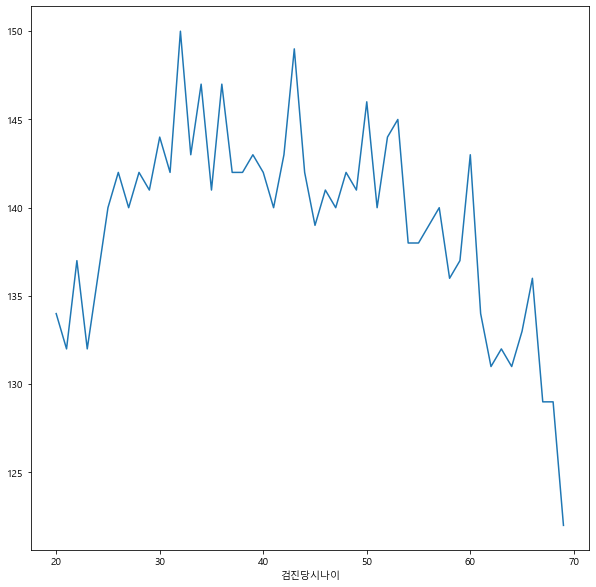

In [82]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [83]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
245797,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.0,1.4,0.40,NaN,NaN,1.0,15.4,15.4,87.57,101.22,156.60,135.23,1.75,11.79,38.87,100.0,100.0,100.00,27.50,27.60,74.01,88.0
245790,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.0,0.9,0.15,NaN,NaN,1.3,16.0,NaN,127.53,124.40,141.96,94.19,44.16,137.17,162.71,100.0,100.0,7.26,22.96,100.00,96.86,101.0
692862,2010,552037,332,2,41,16.0,10.0,46.0,8.0,170.0,0.5,0.10,NaN,NaN,0.8,13.0,NaN,105.95,109.88,101.13,158.25,25.21,112.82,156.09,100.0,100.0,63.58,49.35,100.00,98.52,102.0
58088,2010,171280,431,1,31,25.0,40.0,55.0,49.0,NaN,0.8,NaN,NaN,NaN,0.9,13.3,14.8,61.03,20.59,103.69,12.01,100.00,144.26,100.00,100.0,100.0,115.06,92.67,57.92,83.94,94.0
42070,2010,295306,436,1,30,27.0,47.0,50.0,47.0,NaN,1.0,NaN,NaN,NaN,0.9,9.8,10.9,44.33,10.32,122.31,13.97,100.00,100.00,100.00,100.0,100.0,101.92,175.42,176.38,95.39,100.0


# 결측행 제거

In [84]:
# df_result.dropna(axis=0).info()

In [85]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [86]:
df_target['SEX'].value_counts()

1    475224
2    348541
Name: SEX, dtype: int64

In [87]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

475224

In [88]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
245797,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.0,1.4,0.40,NaN,NaN,1.0,15.4,15.4,87.57,101.22,156.60,135.23,1.75,11.79,38.87,100.0,100.0,100.00,27.50,27.60,74.01,88.0
245790,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.0,0.9,0.15,NaN,NaN,1.3,16.0,NaN,127.53,124.40,141.96,94.19,44.16,137.17,162.71,100.0,100.0,7.26,22.96,100.00,96.86,101.0
58088,2010,171280,431,1,31,25.0,40.0,55.0,49.0,NaN,0.8,NaN,NaN,NaN,0.9,13.3,14.8,61.03,20.59,103.69,12.01,100.00,144.26,100.00,100.0,100.0,115.06,92.67,57.92,83.94,94.0
42070,2010,295306,436,1,30,27.0,47.0,50.0,47.0,NaN,1.0,NaN,NaN,NaN,0.9,9.8,10.9,44.33,10.32,122.31,13.97,100.00,100.00,100.00,100.0,100.0,101.92,175.42,176.38,95.39,100.0
30214,2010,209421,438,1,29,27.0,16.0,44.0,20.0,NaN,0.5,NaN,NaN,NaN,1.1,9.1,8.3,38.56,100.00,137.77,96.84,100.00,175.02,100.00,100.0,100.0,57.24,184.93,192.98,115.28,112.0


# 결측치 처리

## 결측치 삭제

In [89]:
# df_man.dropna(inplace=True)

In [90]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
245797,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.0,1.4,0.40,NaN,NaN,1.0,15.4,15.4,87.57,101.22,156.60,135.23,1.75,11.79,38.87,100.0,100.0,100.00,27.50,27.60,74.01,88.0
245790,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.0,0.9,0.15,NaN,NaN,1.3,16.0,NaN,127.53,124.40,141.96,94.19,44.16,137.17,162.71,100.0,100.0,7.26,22.96,100.00,96.86,101.0
58088,2010,171280,431,1,31,25.0,40.0,55.0,49.0,NaN,0.8,NaN,NaN,NaN,0.9,13.3,14.8,61.03,20.59,103.69,12.01,100.00,144.26,100.00,100.0,100.0,115.06,92.67,57.92,83.94,94.0
42070,2010,295306,436,1,30,27.0,47.0,50.0,47.0,NaN,1.0,NaN,NaN,NaN,0.9,9.8,10.9,44.33,10.32,122.31,13.97,100.00,100.00,100.00,100.0,100.0,101.92,175.42,176.38,95.39,100.0
30214,2010,209421,438,1,29,27.0,16.0,44.0,20.0,NaN,0.5,NaN,NaN,NaN,1.1,9.1,8.3,38.56,100.00,137.77,96.84,100.00,175.02,100.00,100.0,100.0,57.24,184.93,192.98,115.28,112.0


## 결측치 평균으로 대체

In [91]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [92]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [93]:
target_cols

['AST(SGOT)',
 'ALT(SGPT)',
 'ALP',
 'r-GTP(GGT)',
 '유산탈수소효소 (LDH)',
 '총빌리루빈',
 '직접빌리루빈',
 '간접빌리루빈',
 '신사구체여과율 (GFR)',
 '크레아티닌(Creatinine)',
 '요소질소 (BUN)',
 'B/C 비율']

In [94]:
len(df_man)

475224

In [95]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [96]:
len(df_man)

471141

In [97]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
245797,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.0,1.4,0.40,NaN,NaN,1.0,15.4,15.4,87.57,101.22,156.60,135.23,1.75,11.79,38.87,100.0,100.0,100.00,27.50,27.60,74.01,88.0
245790,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.0,0.9,0.15,NaN,NaN,1.3,16.0,NaN,127.53,124.40,141.96,94.19,44.16,137.17,162.71,100.0,100.0,7.26,22.96,100.00,96.86,101.0
58088,2010,171280,431,1,31,25.0,40.0,55.0,49.0,NaN,0.8,NaN,NaN,NaN,0.9,13.3,14.8,61.03,20.59,103.69,12.01,100.00,144.26,100.00,100.0,100.0,115.06,92.67,57.92,83.94,94.0
42070,2010,295306,436,1,30,27.0,47.0,50.0,47.0,NaN,1.0,NaN,NaN,NaN,0.9,9.8,10.9,44.33,10.32,122.31,13.97,100.00,100.00,100.00,100.0,100.0,101.92,175.42,176.38,95.39,100.0
30214,2010,209421,438,1,29,27.0,16.0,44.0,20.0,NaN,0.5,NaN,NaN,NaN,1.1,9.1,8.3,38.56,100.00,137.77,96.84,100.00,175.02,100.00,100.0,100.0,57.24,184.93,192.98,115.28,112.0


## fillna

In [98]:
df_man.mean().round(2)

검진년도                        2021.96
UID                       527056.41
CU_REC_ID                1555627.08
SEX                            1.00
검진당시나이                        41.59
AST(SGOT)                     22.61
ALT(SGPT)                     24.62
ALP                           97.00
r-GTP(GGT)                    29.51
유산탈수소효소 (LDH)                163.95
총빌리루빈                          0.87
직접빌리루빈                         0.26
간접빌리루빈                         0.61
신사구체여과율 (GFR)                 92.56
크레아티닌(Creatinine)              0.96
요소질소 (BUN)                    13.29
B/C 비율                        13.90
AST(SGOT)_kde                 88.91
ALT(SGPT)_kde                 82.37
ALP_kde                       83.53
r-GTP(GGT)_kde                78.17
유산탈수소효소 (LDH)_kde            102.68
총빌리루빈_kde                    110.65
직접빌리루빈_kde                    89.56
간접빌리루빈_kde                   137.11
신사구체여과율 (GFR)_kde            100.50
크레아티닌(Creatinine)_kde         97.77
요소질소 (BUN)_kde              

In [99]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [100]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [101]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [102]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 스크리닝

## ALP 스크리닝

In [103]:
ALP_screening = 80

In [104]:
df_man[df_man['ALP'] < ALP_screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
245797,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.00,1.4,0.40,0.61,92.56,1.0,15.4,15.4,87.57,101.22,156.60,135.23,1.75,11.79,38.87,100.0,100.0,100.00,27.50,27.60,74.01,88.0
245790,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.00,0.9,0.15,0.61,92.56,1.3,16.0,13.9,127.53,124.40,141.96,94.19,44.16,137.17,162.71,100.0,100.0,7.26,22.96,100.00,96.86,101.0
58088,2010,171280,431,1,31,25.0,40.0,55.0,49.0,163.95,0.8,0.26,0.61,92.56,0.9,13.3,14.8,61.03,20.59,103.69,12.01,100.00,144.26,100.00,100.0,100.0,115.06,92.67,57.92,83.94,94.0
42070,2010,295306,436,1,30,27.0,47.0,50.0,47.0,163.95,1.0,0.26,0.61,92.56,0.9,9.8,10.9,44.33,10.32,122.31,13.97,100.00,100.00,100.00,100.0,100.0,101.92,175.42,176.38,95.39,100.0
30214,2010,209421,438,1,29,27.0,16.0,44.0,20.0,163.95,0.5,0.26,0.61,92.56,1.1,9.1,8.3,38.56,100.00,137.77,96.84,100.00,175.02,100.00,100.0,100.0,57.24,184.93,192.98,115.28,112.0


In [105]:
len(df_man[df_man['ALP'] < ALP_screening])

229864

In [106]:
df_man.loc[df_man['ALP'] < ALP_screening, 'ALP'] = ALP_screening

In [107]:
df_man[df_man['ALP'] < ALP_screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target


In [108]:
len(df_man[df_man['ALP'] < ALP_screening])

0

## 요소질소 (BUN) 스크리닝

In [109]:
BUN_screening = 10

In [110]:
df_man[df_man['요소질소 (BUN)'] < BUN_screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
42070,2010,295306,436,1,30,27.0,47.0,80.0,47.0,163.95,1.0,0.26,0.61,92.56,0.9,9.8,10.9,44.33,10.32,122.31,13.97,100.00,100.00,100.00,100.0,100.0,101.92,175.42,176.38,95.39,100.0
30214,2010,209421,438,1,29,27.0,16.0,80.0,20.0,163.95,0.5,0.26,0.61,92.56,1.1,9.1,8.3,38.56,100.00,137.77,96.84,100.00,175.02,100.00,100.0,100.0,57.24,184.93,192.98,115.28,112.0
245776,2010,133016,452,1,42,14.0,17.0,80.0,25.0,163.95,0.6,0.26,0.61,92.56,0.9,9.6,10.7,170.79,101.22,109.21,91.36,100.00,157.13,100.00,100.0,100.0,105.17,173.41,173.03,123.44,117.0
5320,2010,650782,843,1,26,20.0,20.0,80.0,22.0,163.95,1.7,0.26,0.61,92.56,0.8,9.5,11.9,100.00,86.33,137.78,84.94,100.00,2.36,100.00,100.0,100.0,149.04,186.81,176.55,110.32,109.0
135625,2010,122861,1250,1,36,26.0,42.0,223.0,47.0,121.00,0.9,0.30,0.61,92.56,1.2,8.1,13.9,62.91,24.31,12.47,25.74,195.28,144.58,80.59,100.0,100.0,28.18,190.57,100.00,88.72,96.0


In [111]:
len(df_man[df_man['요소질소 (BUN)'] < BUN_screening])

40787

In [112]:
df_man.loc[df_man['요소질소 (BUN)'] < ALP_screening, '요소질소 (BUN)'] = BUN_screening

In [113]:
df_man[df_man['요소질소 (BUN)'] < BUN_screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target


In [114]:
len(df_man[df_man['요소질소 (BUN)'] < BUN_screening])

0

# 중복 제거

In [115]:
len(df_man)

471141

In [116]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [117]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
208380,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.00,0.97,0.20,0.77,87.000000,1.00,10.0,13.80,79.46,34.36,20.48,86.24,156.50,105.45,100.00,177.62,66.34,100.00,54.33,103.85,90.39,97.0
229806,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.00,0.93,0.20,0.73,78.000000,1.10,10.0,12.30,100.42,80.94,18.79,92.77,93.41,113.73,100.00,160.98,41.95,61.55,86.17,154.84,92.13,98.0
249287,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.00,1.01,0.22,0.79,87.000000,1.00,10.0,16.20,87.57,75.22,16.01,85.37,167.60,98.58,86.97,175.67,73.38,100.00,21.84,20.22,84.04,94.0
269021,2022,62,1356310,1,43,18.0,20.0,80.0,20.0,151.00,0.86,0.26,0.60,105.000000,0.84,10.0,15.00,121.00,100.00,100.76,101.17,163.10,126.79,47.45,155.19,159.56,138.81,102.47,49.68,113.83,111.0
288845,2023,62,2170394,1,44,25.0,37.0,80.0,22.0,149.00,1.10,0.30,0.74,93.000000,0.93,10.0,14.10,72.97,32.18,100.00,98.38,175.43,45.60,86.92,177.00,103.65,122.26,98.48,98.69,100.96,104.0
427257,2022,67,1249745,1,54,28.0,33.0,97.0,41.0,185.00,0.60,0.20,0.40,93.000000,0.90,10.0,21.10,50.04,40.32,100.00,38.63,15.98,149.74,100.00,176.47,150.30,100.00,15.13,3.55,78.35,90.0
402250,2022,76,1377275,1,52,19.0,20.0,80.0,21.0,163.95,0.80,0.20,0.60,70.000000,1.10,10.0,19.00,112.56,99.84,103.43,100.00,100.00,144.95,100.00,170.60,30.79,52.56,5.06,6.08,85.49,94.0
402249,2022,76,1359161,1,52,19.0,20.0,80.0,21.0,163.95,0.80,0.20,0.60,70.000000,1.10,10.0,19.00,112.56,99.84,103.43,100.00,100.00,144.95,100.00,170.60,30.79,52.56,5.06,6.08,85.49,94.0
12541,2021,77,621118,1,27,15.0,17.0,80.0,26.0,140.00,1.00,0.40,0.61,92.560000,0.90,10.0,16.22,144.17,98.55,117.28,65.47,183.81,100.00,35.38,100.00,100.00,104.06,29.67,16.51,91.24,98.0
22860,2022,77,1047599,1,28,20.0,20.0,86.0,23.0,170.00,0.60,0.20,0.61,92.560000,0.90,10.0,15.33,100.00,85.30,135.64,88.71,29.35,172.88,76.74,100.00,100.00,100.00,54.43,24.51,88.96,97.0


In [118]:
len(df_man)

471141

In [119]:
df_man[target_cols]

,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율
208380,24.0,37.0,168.0,25.0,156.00,0.97,0.20,0.77,87.0,1.00,10.0,13.8
229806,20.0,25.0,162.0,25.0,164.00,0.93,0.20,0.73,78.0,1.10,10.0,12.3
249287,22.0,27.0,152.0,27.0,152.00,1.01,0.22,0.79,87.0,1.00,10.0,16.2
269021,18.0,20.0,80.0,20.0,151.00,0.86,0.26,0.60,105.0,0.84,10.0,15.0
288845,25.0,37.0,80.0,22.0,149.00,1.10,0.30,0.74,93.0,0.93,10.0,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...
37908,19.0,14.0,80.0,17.0,176.00,1.00,0.30,0.70,120.0,0.80,10.0,13.6
202413,21.0,31.0,97.0,28.0,163.95,0.87,0.26,0.61,113.0,0.80,10.0,13.9
8800,15.0,13.0,83.0,21.0,166.00,0.90,0.30,0.60,117.0,0.90,10.0,17.5
419564,15.0,11.0,80.0,12.0,118.00,1.00,0.30,0.70,102.0,0.80,10.0,9.6


## first만 남겨두고 중복 제거

In [120]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [121]:
len(df_man)

401342

In [122]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
208380,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.00,0.97,0.20,0.77,87.000000,1.00,10.0,13.80,79.46,34.36,20.48,86.24,156.50,105.45,100.00,177.62,66.34,100.00,54.33,103.85,90.39,97.0
229806,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.00,0.93,0.20,0.73,78.000000,1.10,10.0,12.30,100.42,80.94,18.79,92.77,93.41,113.73,100.00,160.98,41.95,61.55,86.17,154.84,92.13,98.0
249287,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.00,1.01,0.22,0.79,87.000000,1.00,10.0,16.20,87.57,75.22,16.01,85.37,167.60,98.58,86.97,175.67,73.38,100.00,21.84,20.22,84.04,94.0
269021,2022,62,1356310,1,43,18.0,20.0,80.0,20.0,151.00,0.86,0.26,0.60,105.000000,0.84,10.0,15.00,121.00,100.00,100.76,101.17,163.10,126.79,47.45,155.19,159.56,138.81,102.47,49.68,113.83,111.0
288845,2023,62,2170394,1,44,25.0,37.0,80.0,22.0,149.00,1.10,0.30,0.74,93.000000,0.93,10.0,14.10,72.97,32.18,100.00,98.38,175.43,45.60,86.92,177.00,103.65,122.26,98.48,98.69,100.96,104.0
427257,2022,67,1249745,1,54,28.0,33.0,97.0,41.0,185.00,0.60,0.20,0.40,93.000000,0.90,10.0,21.10,50.04,40.32,100.00,38.63,15.98,149.74,100.00,176.47,150.30,100.00,15.13,3.55,78.35,90.0
402250,2022,76,1377275,1,52,19.0,20.0,80.0,21.0,163.95,0.80,0.20,0.60,70.000000,1.10,10.0,19.00,112.56,99.84,103.43,100.00,100.00,144.95,100.00,170.60,30.79,52.56,5.06,6.08,85.49,94.0
12541,2021,77,621118,1,27,15.0,17.0,80.0,26.0,140.00,1.00,0.40,0.61,92.560000,0.90,10.0,16.22,144.17,98.55,117.28,65.47,183.81,100.00,35.38,100.00,100.00,104.06,29.67,16.51,91.24,98.0
22860,2022,77,1047599,1,28,20.0,20.0,86.0,23.0,170.00,0.60,0.20,0.61,92.560000,0.90,10.0,15.33,100.00,85.30,135.64,88.71,29.35,172.88,76.74,100.00,100.00,100.00,54.43,24.51,88.96,97.0
36865,2023,77,1739126,1,29,19.0,23.0,95.0,22.0,142.00,0.50,0.20,0.61,92.560000,0.90,10.0,21.22,100.51,82.36,108.84,88.53,182.56,175.02,93.87,100.00,100.00,119.13,6.81,2.87,96.71,101.0


In [123]:
df_man.reset_index(drop=True, inplace=True)

In [124]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.0,0.97,0.20,0.77,87.0,1.00,10.0,13.8,79.46,34.36,20.48,86.24,156.50,105.45,100.00,177.62,66.34,100.00,54.33,103.85,90.39,97.0
1,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.0,0.93,0.20,0.73,78.0,1.10,10.0,12.3,100.42,80.94,18.79,92.77,93.41,113.73,100.00,160.98,41.95,61.55,86.17,154.84,92.13,98.0
2,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.0,1.01,0.22,0.79,87.0,1.00,10.0,16.2,87.57,75.22,16.01,85.37,167.60,98.58,86.97,175.67,73.38,100.00,21.84,20.22,84.04,94.0
3,2022,62,1356310,1,43,18.0,20.0,80.0,20.0,151.0,0.86,0.26,0.60,105.0,0.84,10.0,15.0,121.00,100.00,100.76,101.17,163.10,126.79,47.45,155.19,159.56,138.81,102.47,49.68,113.83,111.0
4,2023,62,2170394,1,44,25.0,37.0,80.0,22.0,149.0,1.10,0.30,0.74,93.0,0.93,10.0,14.1,72.97,32.18,100.00,98.38,175.43,45.60,86.92,177.00,103.65,122.26,98.48,98.69,100.96,104.0


In [125]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401342 entries, 0 to 401341
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   검진년도                   401342 non-null  int64  
 1   UID                    401342 non-null  int64  
 2   CU_REC_ID              401342 non-null  int64  
 3   SEX                    401342 non-null  int64  
 4   검진당시나이                 401342 non-null  int64  
 5   AST(SGOT)              401342 non-null  float64
 6   ALT(SGPT)              401342 non-null  float64
 7   ALP                    401342 non-null  float64
 8   r-GTP(GGT)             401342 non-null  float64
 9   유산탈수소효소 (LDH)          401342 non-null  float64
 10  총빌리루빈                  401342 non-null  float64
 11  직접빌리루빈                 401342 non-null  float64
 12  간접빌리루빈                 401342 non-null  float64
 13  신사구체여과율 (GFR)          401342 non-null  float64
 14  크레아티닌(Creatinine)      401342 non-nu

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

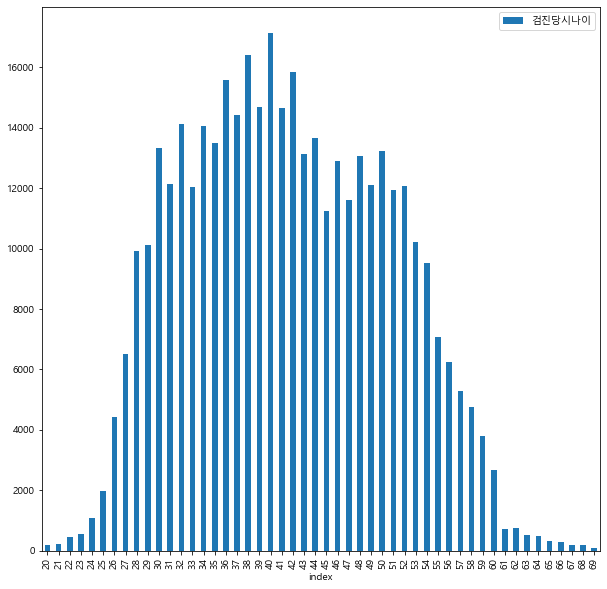

In [126]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [127]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,172
45,21,221
42,22,437
39,23,555
36,24,1085
35,25,1966
32,26,4435
28,27,6498
25,28,9913
24,29,10125


# 검진항목 시각화

In [128]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
count,401342.000000,4.013420e+05,4.013420e+05,401342.0,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.0,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000
mean,2021.913929,5.213773e+05,1.548328e+06,1.0,41.592632,22.638785,24.661158,107.685693,29.553032,164.044926,0.874740,0.257355,0.614324,92.678065,0.964241,10.0,13.893990,88.698721,82.216736,83.004535,78.022482,102.508629,110.021305,89.862400,137.531402,100.885157,97.797486,98.340965,103.769941,97.721651,101.777656
std,1.736331,3.706953e+05,8.003608e+05,0.0,8.955110,5.671779,10.165410,43.932887,13.992056,21.965712,0.263237,0.074266,0.189747,14.637981,0.142178,0.0,2.739114,40.228686,39.740683,41.768770,38.879974,58.936523,50.042100,32.737551,40.271149,53.380768,41.399232,54.886764,59.216559,17.663918,10.569247
min,2010.000000,6.200000e+01,2.530000e+02,1.0,20.000000,5.000000,1.000000,80.000000,1.000000,78.000000,0.000000,0.060000,-0.200000,47.000000,0.420000,10.0,4.500000,0.280000,1.140000,0.520000,0.930000,0.060000,0.120000,7.520000,0.210000,0.020000,0.160000,1.060000,0.090000,17.920000,54.000000
25%,2021.000000,2.246930e+05,7.028815e+05,1.0,34.000000,19.000000,17.000000,80.000000,19.000000,153.000000,0.700000,0.200000,0.500000,83.000000,0.880000,10.0,12.292500,61.030000,51.090000,62.560000,44.840000,65.410000,99.730000,76.740000,100.000000,50.732500,64.370000,44.290000,50.780000,85.990000,95.000000
50%,2022.000000,3.878610e+05,1.555204e+06,1.0,41.000000,22.000000,23.000000,82.000000,26.000000,163.950000,0.870000,0.260000,0.610000,92.560000,0.970000,10.0,13.900000,97.200000,90.440000,100.000000,86.720000,100.000000,120.790000,100.000000,158.230000,100.000000,100.000000,100.000000,100.000000,97.620000,102.000000
75%,2023.000000,8.505768e+05,2.262382e+06,1.0,49.000000,26.000000,30.000000,99.000000,37.000000,169.000000,1.000000,0.300000,0.690000,101.000000,1.070000,10.0,15.000000,107.110000,102.140000,104.190000,101.020000,163.050000,149.180000,100.000000,169.100000,157.850000,128.190000,147.640000,164.390000,109.480000,109.000000
max,2024.000000,1.473645e+06,2.871445e+06,1.0,69.000000,40.200000,56.500000,250.000000,72.500000,262.000000,1.800000,0.440000,1.400000,147.000000,1.450000,10.0,24.750000,200.000000,199.980000,199.610000,199.820000,200.000000,200.000000,194.820000,200.000000,200.000000,200.000000,200.000000,200.000000,171.040000,146.000000


<AxesSubplot:xlabel='검진당시나이'>

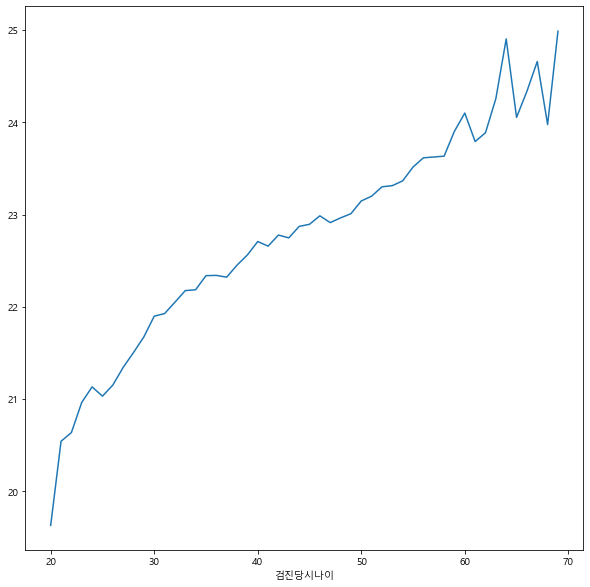

In [129]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

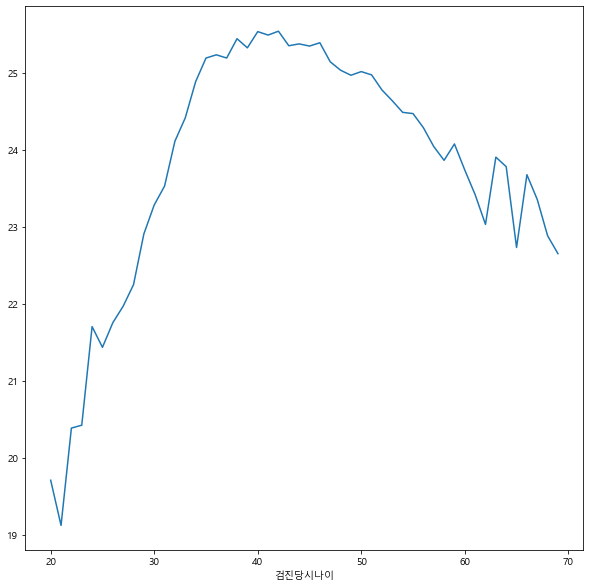

In [130]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

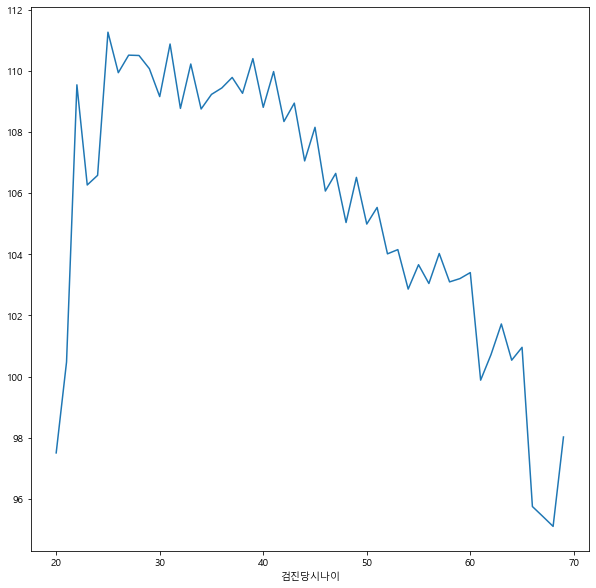

In [131]:
df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

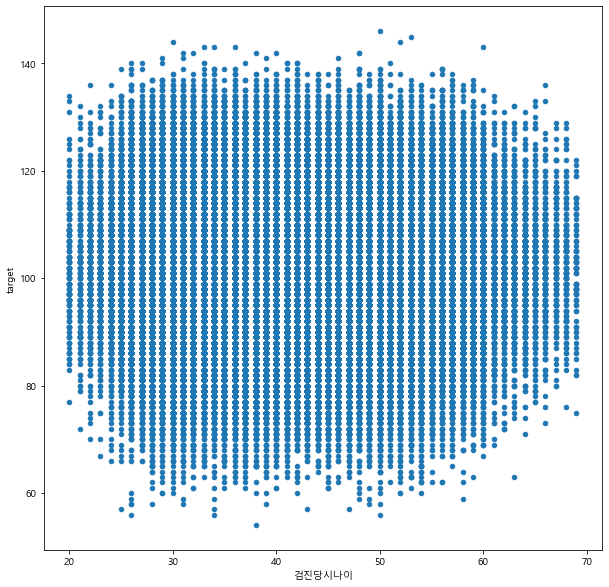

In [132]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

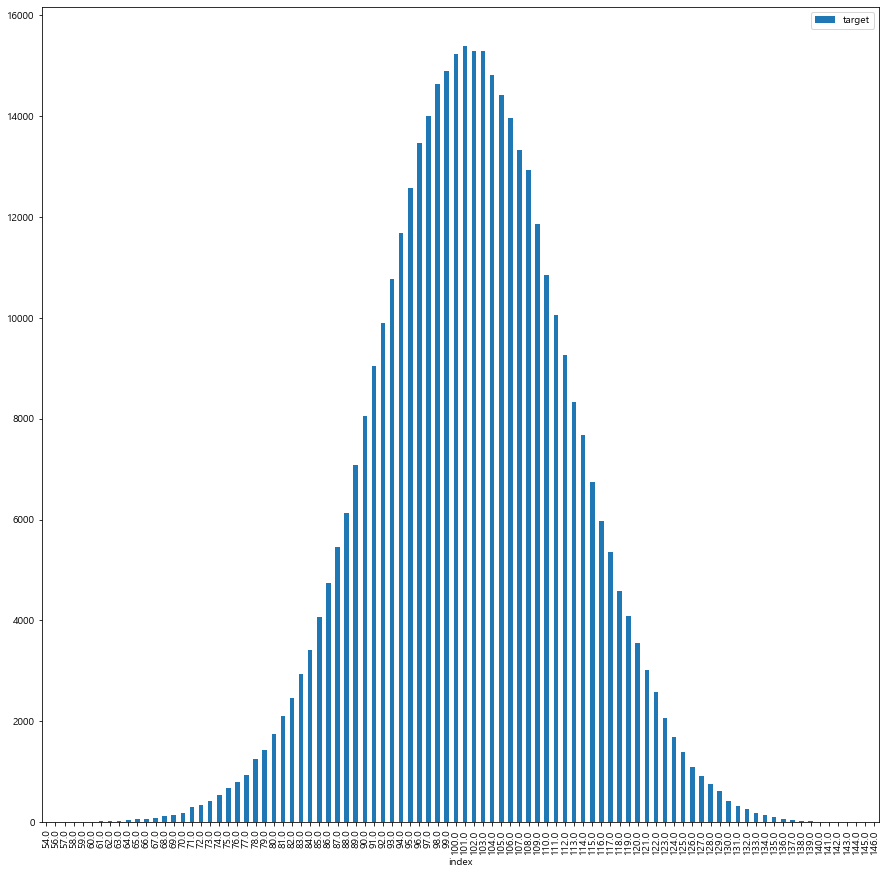

In [133]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [134]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
90,54.0,1
87,56.0,3
84,57.0,4
81,58.0,7
82,59.0,6
79,60.0,12
78,61.0,16
77,62.0,23
74,63.0,32
73,64.0,36


In [135]:
df_man_sampling = pd.DataFrame()

for target in range(int(df_man['target'].min()), 100):
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [136]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

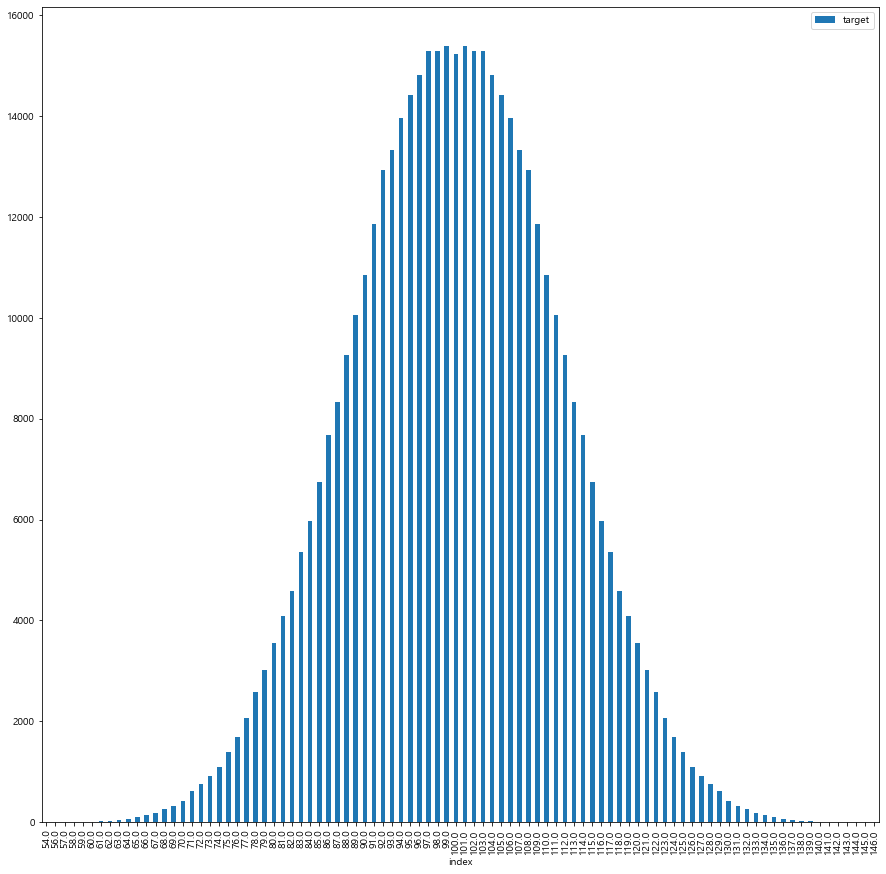

In [137]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [138]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
91,54.0,1
88,56.0,3
86,57.0,4
82,58.0,7
84,59.0,6
80,60.0,12
77,61.0,24
76,62.0,31
74,63.0,46
72,64.0,72


# 나이별 확인하기

In [139]:
# target = 'target'

In [140]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [141]:
# df_man = df_man_sample

In [142]:
# int(df_man['검진당시나이'].value_counts().mean())

In [143]:
# df_man['검진당시나이'].min()

In [144]:
# df_man['검진당시나이'].max()

In [145]:
# df_man.columns

In [146]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [147]:
# df_temp.info()

In [148]:
# df_temp.reset_index(drop=True, inplace=True)

In [149]:
# df_man = df_temp.copy()

In [150]:
# df_man['검진당시나이'].value_counts()

In [151]:
# df_man[df_man['검진당시나이']==38]

In [152]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [153]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'AST(SGOT)', 'ALT(SGPT)',
       'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', '총빌리루빈', '직접빌리루빈', '간접빌리루빈',
       '신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', 'B/C 비율',
       'AST(SGOT)_kde', 'ALT(SGPT)_kde', 'ALP_kde', 'r-GTP(GGT)_kde',
       '유산탈수소효소 (LDH)_kde', '총빌리루빈_kde', '직접빌리루빈_kde', '간접빌리루빈_kde',
       '신사구체여과율 (GFR)_kde', '크레아티닌(Creatinine)_kde', '요소질소 (BUN)_kde',
       'B/C 비율_kde', 'kde_mean', 'target'],
      dtype='object')

In [154]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [155]:
target_cols

['AST(SGOT)',
 'ALT(SGPT)',
 'ALP',
 'r-GTP(GGT)',
 '유산탈수소효소 (LDH)',
 '총빌리루빈',
 '직접빌리루빈',
 '간접빌리루빈',
 '신사구체여과율 (GFR)',
 '크레아티닌(Creatinine)',
 '요소질소 (BUN)',
 'B/C 비율']

In [156]:
train_columns = target_cols

In [157]:
target_col = 'target'

## Min Max Scaling

In [158]:
from sklearn.preprocessing import MinMaxScaler

In [159]:
scaling_bool

False

In [160]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [161]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [162]:
# model = LinearRegression()

In [163]:
# model.fit(X_train, y_train)

In [164]:
# model.intercept_

In [165]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [166]:
model = XGBRegressor()

In [167]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [168]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [169]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 3192.13 seconds for 10 candidates parameter settings.


In [170]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.3,
 'booster': 'gbtree'}

In [171]:
# best score
random_search.best_score_

-4.70926423715626

In [172]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [173]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [174]:
# model = build_model()

In [175]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [176]:
# model.summary()

In [177]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [178]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [179]:
# plot_history(history)

## pyTorch 신경망

In [180]:
np.shape(X_train)[1]

12

In [181]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
        self.fc2 = nn.Linear(100, 50) #두 번째 레이어
        self.fc3 = nn.Linear(50, 1) #출력 레이어 
#         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
#         self.relu = nn.ReLU()
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #활성화 함수 적용                 
#         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
        x = F.relu(self.fc2(x)) #활성화 함수 적용 
        x = F.relu(self.fc3(x))
#         x = self.fc1(x)
#         x = self.fc2(x)
#         x = self.fc3(x)
#         x = self.relu(x)
        return x

In [182]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [183]:
# epochs = 1000

In [184]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [185]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [186]:
# plt.plot(losses)

## coef 계산

In [187]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [188]:
# df_coef.columns = ['검사항목', 'coef']

In [189]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [190]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [191]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [192]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [193]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [194]:
# slr = LinearRegression()

In [195]:
# slr.fit(X_train_poly, y_train)

In [196]:
# np.shape(X_train)

In [197]:
# np.shape(X_train_poly)

In [198]:
# np.shape(X_test)

In [199]:
# np.shape(X_test_poly)

In [200]:
# y_pred_poly = slr.predict(X_test_poly)

In [201]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [202]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [203]:
# model_path = './model/03/11/20/best_estimator.pkl'

In [204]:
# import pickle
# with open(model_path,'wb') as f:
#     pickle.dump(model, f)

In [205]:
# with open(model_path, 'rb') as f:
#     model = pickle.load(f) 

In [206]:
# Get predictions
# y_pred = model.predict(X_test)

# 성능 평가

## pyTorch 예측

In [207]:
pyTorch_bool

False

In [208]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [209]:
XGB_bool

True

In [210]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [211]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 1.6066772953000417
MSE : 4.6472015939009905
RMSE : 2.1557369027552946


In [212]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9636878171940698

In [213]:
model.score(X_test, y_test)

0.9636878171940698

## feature importance

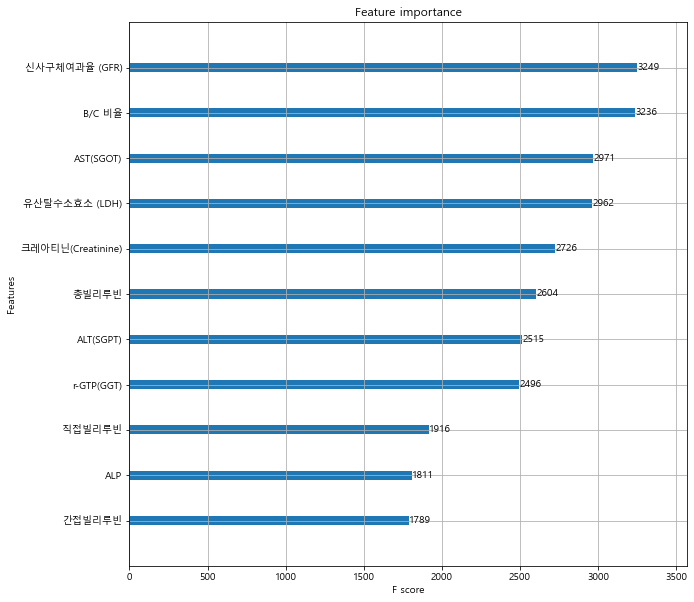

In [214]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model)

# 실제지수 - 예측지수 결과

In [215]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,106.0
1,108.0
2,100.0
3,91.0
4,92.0
...,...
113522,106.0
113523,117.0
113524,84.0
113525,95.0


In [216]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,105.005798
1,106.013817
2,102.315659
3,92.011192
4,92.747925
...,...
113522,106.157181
113523,117.292114
113524,82.390953
113525,95.162308


In [217]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [218]:
df_test.head()

,target,0
0,106.0,105.005798
1,108.0,106.013817
2,100.0,102.315659
3,91.0,92.011192
4,92.0,92.747925


In [219]:
df_test.columns

Index(['target', 0], dtype='object')

In [220]:
df_test.columns = ['실제지수', '예측지수']

In [221]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [222]:
df_test.head()

,실제지수,예측지수,diff
0,106.0,105.005798,-0.994202
1,108.0,106.013817,-1.986183
2,100.0,102.315659,2.315659
3,91.0,92.011192,1.011192
4,92.0,92.747925,0.747925


In [223]:
df_test['diff_int'] = df_test['diff'].round(0)

In [224]:
len(df_test)

113527

In [225]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,106.0,105.005798,-0.994202,-1.0
1,108.0,106.013817,-1.986183,-2.0
2,100.0,102.315659,2.315659,2.0
3,91.0,92.011192,1.011192,1.0
4,92.0,92.747925,0.747925,1.0


<AxesSubplot:>

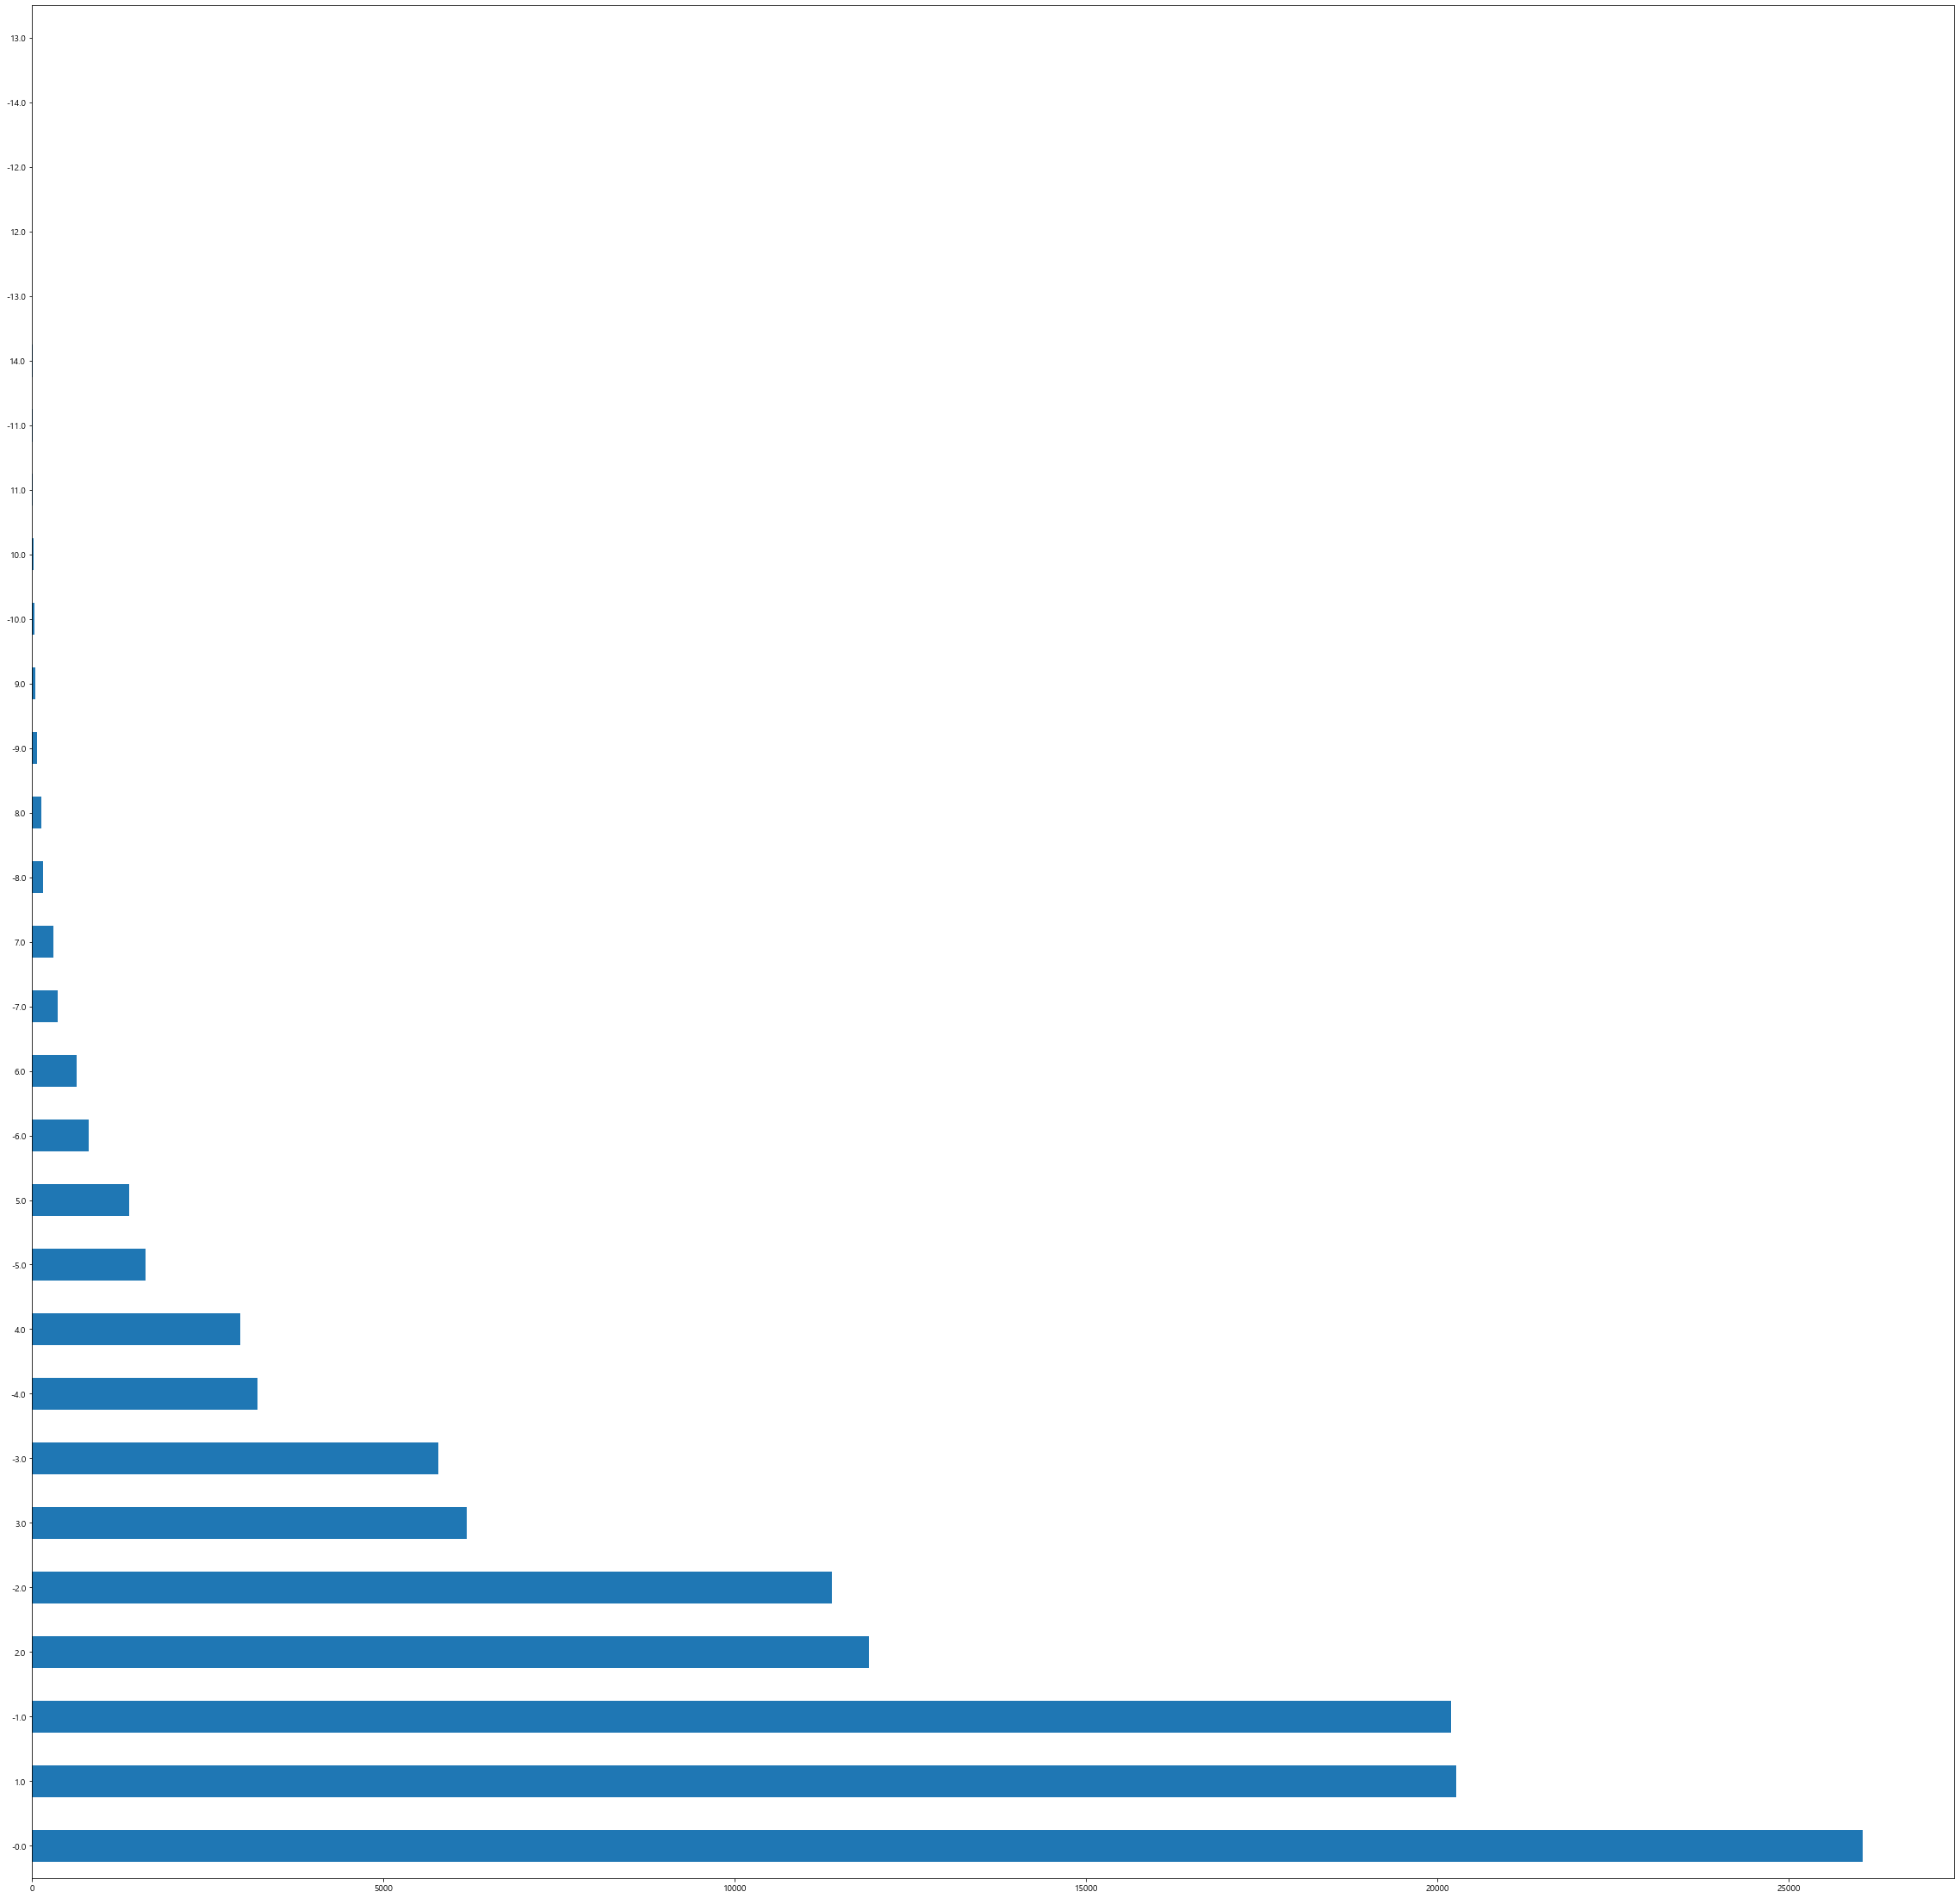

In [226]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [227]:
df_test['diff_int'].value_counts(ascending=False)

-0.0     26051
 1.0     20265
-1.0     20189
 2.0     11905
-2.0     11388
 3.0      6181
-3.0      5786
-4.0      3214
 4.0      2961
-5.0      1610
 5.0      1380
-6.0       802
 6.0       631
-7.0       361
 7.0       307
-8.0       154
 8.0       130
-9.0        71
 9.0        49
-10.0       35
 10.0       23
 11.0       12
-11.0       11
 14.0        4
-13.0        2
 12.0        2
-12.0        1
-14.0        1
 13.0        1
Name: diff_int, dtype: int64

In [228]:
df_test['예측지수'].round(0).value_counts()

102.0    3957
99.0     3937
98.0     3927
103.0    3879
101.0    3873
100.0    3839
97.0     3834
104.0    3787
96.0     3757
105.0    3668
95.0     3570
106.0    3568
94.0     3547
107.0    3385
93.0     3372
108.0    3208
92.0     3184
109.0    2989
91.0     2911
90.0     2710
110.0    2687
89.0     2622
111.0    2462
88.0     2336
112.0    2322
113.0    2109
87.0     2087
114.0    1922
86.0     1823
115.0    1680
85.0     1648
116.0    1519
117.0    1426
84.0     1379
83.0     1301
82.0     1141
118.0    1127
81.0      969
119.0     954
120.0     903
80.0      848
79.0      760
121.0     733
78.0      584
122.0     584
77.0      526
123.0     499
76.0      410
124.0     346
75.0      317
125.0     303
126.0     291
74.0      262
127.0     216
73.0      209
72.0      178
128.0     170
71.0      135
129.0     133
70.0      105
130.0      82
131.0      69
68.0       63
69.0       57
132.0      55
67.0       47
133.0      37
134.0      32
66.0       26
65.0       21
135.0      18
64.0  

# 예측 나이 분포

In [229]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [230]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [231]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [232]:
df_plot = pd.DataFrame(y_test.value_counts())

In [233]:
df_plot.columns = ['count']

In [234]:
df_plot.reset_index(inplace=True)

In [235]:
df_plot = df_plot.sort_values('index', ascending=True)

In [236]:
df_plot

,index,count
83,57.0,2
86,58.0,1
79,60.0,4
76,61.0,6
74,62.0,13
72,63.0,15
71,64.0,17
69,65.0,28
68,66.0,29
65,67.0,53


In [237]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

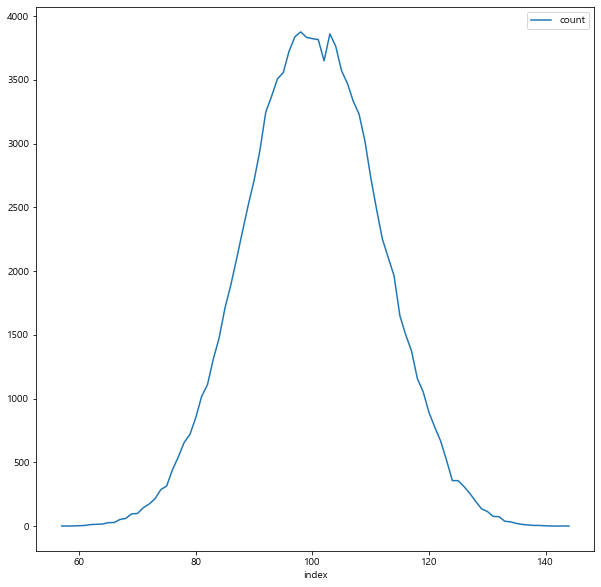

In [238]:
df_plot.plot()

In [239]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [240]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [241]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [242]:
df_plot.columns = ['count']

In [243]:
df_plot.reset_index(inplace=True)

In [244]:
df_plot = df_plot.sort_values(0, ascending=True)

In [245]:
df_plot.set_index(0, inplace=True)

In [246]:
df_plot

,count
0,
57.0,1
59.0,2
60.0,3
61.0,9
62.0,10
63.0,16
64.0,16
65.0,21
66.0,26


<AxesSubplot:xlabel='0'>

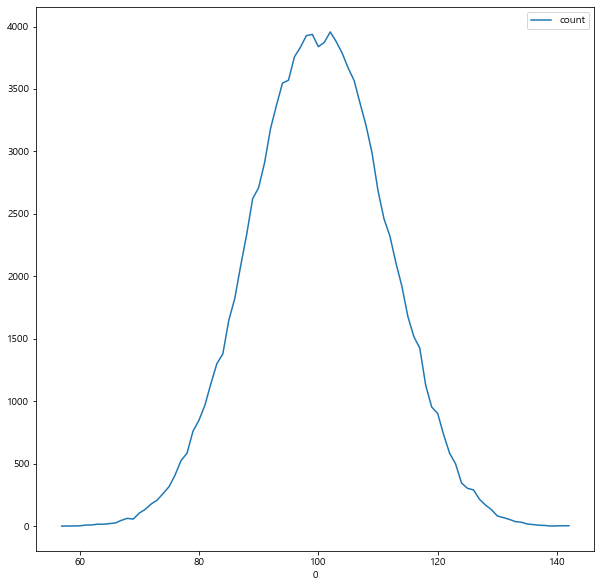

In [247]:
df_plot.plot()

# 시각화

In [248]:
# model.coef_

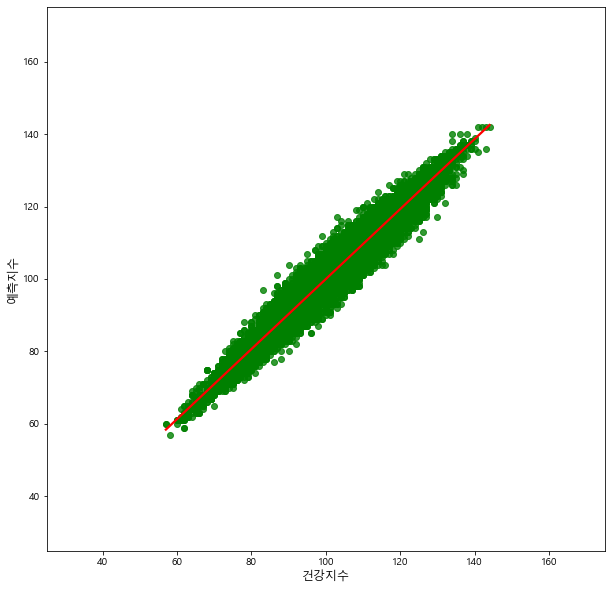

In [249]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [250]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.0,0.97,0.20,0.77,87.0,1.00,10.0,13.8,79.46,34.36,20.48,86.24,156.50,105.45,100.00,177.62,66.34,100.00,54.33,103.85,90.39,97.0
1,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.0,0.93,0.20,0.73,78.0,1.10,10.0,12.3,100.42,80.94,18.79,92.77,93.41,113.73,100.00,160.98,41.95,61.55,86.17,154.84,92.13,98.0
2,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.0,1.01,0.22,0.79,87.0,1.00,10.0,16.2,87.57,75.22,16.01,85.37,167.60,98.58,86.97,175.67,73.38,100.00,21.84,20.22,84.04,94.0
3,2022,62,1356310,1,43,18.0,20.0,80.0,20.0,151.0,0.86,0.26,0.60,105.0,0.84,10.0,15.0,121.00,100.00,100.76,101.17,163.10,126.79,47.45,155.19,159.56,138.81,102.47,49.68,113.83,111.0
4,2023,62,2170394,1,44,25.0,37.0,80.0,22.0,149.0,1.10,0.30,0.74,93.0,0.93,10.0,14.1,72.97,32.18,100.00,98.38,175.43,45.60,86.92,177.00,103.65,122.26,98.48,98.69,100.96,104.0


In [251]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401342 entries, 0 to 401341
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   검진년도                   401342 non-null  int64  
 1   UID                    401342 non-null  int64  
 2   CU_REC_ID              401342 non-null  int64  
 3   SEX                    401342 non-null  int64  
 4   검진당시나이                 401342 non-null  int64  
 5   AST(SGOT)              401342 non-null  float64
 6   ALT(SGPT)              401342 non-null  float64
 7   ALP                    401342 non-null  float64
 8   r-GTP(GGT)             401342 non-null  float64
 9   유산탈수소효소 (LDH)          401342 non-null  float64
 10  총빌리루빈                  401342 non-null  float64
 11  직접빌리루빈                 401342 non-null  float64
 12  간접빌리루빈                 401342 non-null  float64
 13  신사구체여과율 (GFR)          401342 non-null  float64
 14  크레아티닌(Creatinine)      401342 non-nu

In [252]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
61023,2022,168996,2259500,1,35,17.0,13.0,80.0,45.0,179.0,0.9,0.3,0.6,76.0,1.1,10.0,9.5,129.90,135.05,147.81,24.32,22.87,130.42,83.25,152.26,38.73,66.95,161.41,182.85,106.32,107.0
61024,2023,168996,2259499,1,36,17.0,14.0,80.0,26.0,173.0,1.1,0.4,0.7,76.0,1.1,10.0,11.9,119.61,123.85,116.41,83.34,27.28,41.20,30.08,169.73,32.62,57.92,94.86,171.36,89.02,97.0


In [253]:
train_columns

['AST(SGOT)',
 'ALT(SGPT)',
 'ALP',
 'r-GTP(GGT)',
 '유산탈수소효소 (LDH)',
 '총빌리루빈',
 '직접빌리루빈',
 '간접빌리루빈',
 '신사구체여과율 (GFR)',
 '크레아티닌(Creatinine)',
 '요소질소 (BUN)',
 'B/C 비율']

In [254]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [255]:
len(df_pred)

401342

In [256]:
df_pred.reset_index(drop=True, inplace=True)

In [257]:
X_test

,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율
179623,33.0,31.0,97.0,26.0,163.95,0.87,0.26,0.61,140.0,0.60,10.0,13.90
102037,25.0,25.0,80.0,20.0,149.00,1.30,0.40,0.90,84.0,1.00,10.0,10.50
152226,20.0,21.0,80.0,47.0,153.00,0.90,0.20,0.70,88.0,0.90,10.0,17.80
279563,26.0,42.0,80.0,46.0,209.00,0.80,0.30,0.61,127.0,0.73,10.0,19.60
166817,23.0,35.0,80.0,26.0,182.00,0.60,0.26,0.61,90.0,0.90,10.0,16.30
...,...,...,...,...,...,...,...,...,...,...,...,...
341254,23.0,17.0,97.0,36.0,163.95,0.87,0.26,0.61,100.0,0.80,10.0,13.90
17497,13.0,15.0,84.0,58.0,163.95,0.47,0.28,0.61,90.0,0.88,10.0,9.32
366171,30.0,41.0,181.0,40.0,190.00,0.60,0.10,0.50,91.0,1.00,10.0,16.00
371969,21.0,23.0,97.0,20.0,163.95,0.87,0.26,0.61,67.0,1.20,10.0,13.90


In [258]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'AST(SGOT)', 'ALT(SGPT)',
       'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', '총빌리루빈', '직접빌리루빈', '간접빌리루빈',
       '신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', 'B/C 비율',
       'AST(SGOT)_kde', 'ALT(SGPT)_kde', 'ALP_kde', 'r-GTP(GGT)_kde',
       '유산탈수소효소 (LDH)_kde', '총빌리루빈_kde', '직접빌리루빈_kde', '간접빌리루빈_kde',
       '신사구체여과율 (GFR)_kde', '크레아티닌(Creatinine)_kde', '요소질소 (BUN)_kde',
       'B/C 비율_kde', 'kde_mean', 'target'],
      dtype='object')

In [259]:
df_pred[train_columns]

,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율
0,24.0,37.0,168.0,25.0,156.00,0.97,0.20,0.77,87.0,1.00,10.0,13.8
1,20.0,25.0,162.0,25.0,164.00,0.93,0.20,0.73,78.0,1.10,10.0,12.3
2,22.0,27.0,152.0,27.0,152.00,1.01,0.22,0.79,87.0,1.00,10.0,16.2
3,18.0,20.0,80.0,20.0,151.00,0.86,0.26,0.60,105.0,0.84,10.0,15.0
4,25.0,37.0,80.0,22.0,149.00,1.10,0.30,0.74,93.0,0.93,10.0,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...
401337,19.0,14.0,80.0,17.0,176.00,1.00,0.30,0.70,120.0,0.80,10.0,13.6
401338,21.0,31.0,97.0,28.0,163.95,0.87,0.26,0.61,113.0,0.80,10.0,13.9
401339,15.0,13.0,83.0,21.0,166.00,0.90,0.30,0.60,117.0,0.90,10.0,17.5
401340,15.0,11.0,80.0,12.0,118.00,1.00,0.30,0.70,102.0,0.80,10.0,9.6


In [260]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [261]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [262]:
pred_data = pred_data.round(0)

In [263]:
pred_data

array([ 99., 100.,  93., ..., 104., 133.,  92.], dtype=float32)

In [264]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [265]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [266]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target,예측지수
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.00,0.97,0.20,0.77,87.000000,1.00,10.0,13.80,79.46,34.36,20.48,86.24,156.50,105.45,100.00,177.62,66.34,100.00,54.33,103.85,90.39,97.0,99.0
1,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.00,0.93,0.20,0.73,78.000000,1.10,10.0,12.30,100.42,80.94,18.79,92.77,93.41,113.73,100.00,160.98,41.95,61.55,86.17,154.84,92.13,98.0,100.0
2,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.00,1.01,0.22,0.79,87.000000,1.00,10.0,16.20,87.57,75.22,16.01,85.37,167.60,98.58,86.97,175.67,73.38,100.00,21.84,20.22,84.04,94.0,93.0
3,2022,62,1356310,1,43,18.0,20.0,80.0,20.0,151.00,0.86,0.26,0.60,105.000000,0.84,10.0,15.00,121.00,100.00,100.76,101.17,163.10,126.79,47.45,155.19,159.56,138.81,102.47,49.68,113.83,111.0,116.0
4,2023,62,2170394,1,44,25.0,37.0,80.0,22.0,149.00,1.10,0.30,0.74,93.000000,0.93,10.0,14.10,72.97,32.18,100.00,98.38,175.43,45.60,86.92,177.00,103.65,122.26,98.48,98.69,100.96,104.0,102.0
5,2022,67,1249745,1,54,28.0,33.0,97.0,41.0,185.00,0.60,0.20,0.40,93.000000,0.90,10.0,21.10,50.04,40.32,100.00,38.63,15.98,149.74,100.00,176.47,150.30,100.00,15.13,3.55,78.35,90.0,90.0
6,2022,76,1377275,1,52,19.0,20.0,80.0,21.0,163.95,0.80,0.20,0.60,70.000000,1.10,10.0,19.00,112.56,99.84,103.43,100.00,100.00,144.95,100.00,170.60,30.79,52.56,5.06,6.08,85.49,94.0,95.0
7,2021,77,621118,1,27,15.0,17.0,80.0,26.0,140.00,1.00,0.40,0.61,92.560000,0.90,10.0,16.22,144.17,98.55,117.28,65.47,183.81,100.00,35.38,100.00,100.00,104.06,29.67,16.51,91.24,98.0,101.0
8,2022,77,1047599,1,28,20.0,20.0,86.0,23.0,170.00,0.60,0.20,0.61,92.560000,0.90,10.0,15.33,100.00,85.30,135.64,88.71,29.35,172.88,76.74,100.00,100.00,100.00,54.43,24.51,88.96,97.0,98.0
9,2023,77,1739126,1,29,19.0,23.0,95.0,22.0,142.00,0.50,0.20,0.61,92.560000,0.90,10.0,21.22,100.51,82.36,108.84,88.53,182.56,175.02,93.87,100.00,100.00,119.13,6.81,2.87,96.71,101.0,99.0


## 예측지수 성능평가

In [267]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

1.6076911960372948

# target으로 나이 계산

In [268]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [269]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target,예측지수,예측나이
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.00,0.97,0.20,0.77,87.000000,1.00,10.0,13.80,79.46,34.36,20.48,86.24,156.50,105.45,100.00,177.62,66.34,100.00,54.33,103.85,90.39,97.0,99.0,40.2
1,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.00,0.93,0.20,0.73,78.000000,1.10,10.0,12.30,100.42,80.94,18.79,92.77,93.41,113.73,100.00,160.98,41.95,61.55,86.17,154.84,92.13,98.0,100.0,41.0
2,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.00,1.01,0.22,0.79,87.000000,1.00,10.0,16.20,87.57,75.22,16.01,85.37,167.60,98.58,86.97,175.67,73.38,100.00,21.84,20.22,84.04,94.0,93.0,43.4
3,2022,62,1356310,1,43,18.0,20.0,80.0,20.0,151.00,0.86,0.26,0.60,105.000000,0.84,10.0,15.00,121.00,100.00,100.76,101.17,163.10,126.79,47.45,155.19,159.56,138.81,102.47,49.68,113.83,111.0,116.0,39.8
4,2023,62,2170394,1,44,25.0,37.0,80.0,22.0,149.00,1.10,0.30,0.74,93.000000,0.93,10.0,14.10,72.97,32.18,100.00,98.38,175.43,45.60,86.92,177.00,103.65,122.26,98.48,98.69,100.96,104.0,102.0,43.6
5,2022,67,1249745,1,54,28.0,33.0,97.0,41.0,185.00,0.60,0.20,0.40,93.000000,0.90,10.0,21.10,50.04,40.32,100.00,38.63,15.98,149.74,100.00,176.47,150.30,100.00,15.13,3.55,78.35,90.0,90.0,56.0
6,2022,76,1377275,1,52,19.0,20.0,80.0,21.0,163.95,0.80,0.20,0.60,70.000000,1.10,10.0,19.00,112.56,99.84,103.43,100.00,100.00,144.95,100.00,170.60,30.79,52.56,5.06,6.08,85.49,94.0,95.0,53.0
7,2021,77,621118,1,27,15.0,17.0,80.0,26.0,140.00,1.00,0.40,0.61,92.560000,0.90,10.0,16.22,144.17,98.55,117.28,65.47,183.81,100.00,35.38,100.00,100.00,104.06,29.67,16.51,91.24,98.0,101.0,26.8
8,2022,77,1047599,1,28,20.0,20.0,86.0,23.0,170.00,0.60,0.20,0.61,92.560000,0.90,10.0,15.33,100.00,85.30,135.64,88.71,29.35,172.88,76.74,100.00,100.00,100.00,54.43,24.51,88.96,97.0,98.0,28.4
9,2023,77,1739126,1,29,19.0,23.0,95.0,22.0,142.00,0.50,0.20,0.61,92.560000,0.90,10.0,21.22,100.51,82.36,108.84,88.53,182.56,175.02,93.87,100.00,100.00,119.13,6.81,2.87,96.71,101.0,99.0,29.2


## 예측나이 성능평가

In [270]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

1.6784119279816216

# 최종 산출

In [271]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target,예측지수,예측나이
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.0,0.97,0.20,0.77,87.0,1.00,10.0,13.8,79.46,34.36,20.48,86.24,156.50,105.45,100.00,177.62,66.34,100.00,54.33,103.85,90.39,97.0,99.0,40.2
1,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.0,0.93,0.20,0.73,78.0,1.10,10.0,12.3,100.42,80.94,18.79,92.77,93.41,113.73,100.00,160.98,41.95,61.55,86.17,154.84,92.13,98.0,100.0,41.0
2,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.0,1.01,0.22,0.79,87.0,1.00,10.0,16.2,87.57,75.22,16.01,85.37,167.60,98.58,86.97,175.67,73.38,100.00,21.84,20.22,84.04,94.0,93.0,43.4
3,2022,62,1356310,1,43,18.0,20.0,80.0,20.0,151.0,0.86,0.26,0.60,105.0,0.84,10.0,15.0,121.00,100.00,100.76,101.17,163.10,126.79,47.45,155.19,159.56,138.81,102.47,49.68,113.83,111.0,116.0,39.8
4,2023,62,2170394,1,44,25.0,37.0,80.0,22.0,149.0,1.10,0.30,0.74,93.0,0.93,10.0,14.1,72.97,32.18,100.00,98.38,175.43,45.60,86.92,177.00,103.65,122.26,98.48,98.69,100.96,104.0,102.0,43.6


In [272]:
# df_output.to_csv('man.csv')

# 최종 UID별 확인

In [273]:
df_output

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target,예측지수,예측나이
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.00,0.97,0.20,0.77,87.0,1.00,10.0,13.8,79.46,34.36,20.48,86.24,156.50,105.45,100.00,177.62,66.34,100.00,54.33,103.85,90.39,97.0,99.0,40.2
1,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.00,0.93,0.20,0.73,78.0,1.10,10.0,12.3,100.42,80.94,18.79,92.77,93.41,113.73,100.00,160.98,41.95,61.55,86.17,154.84,92.13,98.0,100.0,41.0
2,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.00,1.01,0.22,0.79,87.0,1.00,10.0,16.2,87.57,75.22,16.01,85.37,167.60,98.58,86.97,175.67,73.38,100.00,21.84,20.22,84.04,94.0,93.0,43.4
3,2022,62,1356310,1,43,18.0,20.0,80.0,20.0,151.00,0.86,0.26,0.60,105.0,0.84,10.0,15.0,121.00,100.00,100.76,101.17,163.10,126.79,47.45,155.19,159.56,138.81,102.47,49.68,113.83,111.0,116.0,39.8
4,2023,62,2170394,1,44,25.0,37.0,80.0,22.0,149.00,1.10,0.30,0.74,93.0,0.93,10.0,14.1,72.97,32.18,100.00,98.38,175.43,45.60,86.92,177.00,103.65,122.26,98.48,98.69,100.96,104.0,102.0,43.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401337,2024,1473554,2870504,1,29,19.0,14.0,80.0,17.0,176.00,1.00,0.30,0.70,120.0,0.80,10.0,13.6,100.51,108.20,108.33,101.65,11.89,100.00,81.64,169.10,170.79,150.94,164.82,113.66,115.13,112.0,112.0,26.6
401338,2024,1473563,2870572,1,39,21.0,31.0,97.0,28.0,163.95,0.87,0.26,0.61,113.0,0.80,10.0,13.9,99.22,57.31,100.00,76.54,100.00,100.00,100.00,100.00,174.88,144.99,100.00,100.00,104.41,106.0,104.0,38.2
401339,2024,1473599,2870970,1,26,15.0,13.0,83.0,21.0,166.00,0.90,0.30,0.60,117.0,0.90,10.0,17.5,139.20,117.32,144.45,90.86,34.12,157.03,69.59,169.77,165.86,128.21,20.07,7.40,103.66,105.0,104.0,25.2
401340,2024,1473602,2870997,1,53,15.0,11.0,80.0,12.0,118.00,1.00,0.30,0.70,102.0,0.80,10.0,9.6,159.11,164.13,122.00,159.18,193.90,98.23,88.83,168.59,167.08,131.01,195.70,186.94,152.89,135.0,133.0,46.4


In [274]:
# 성주용
df_output[df_output['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target,예측지수,예측나이
327603,2023,897595,2328772,1,40,11.0,18.0,80.0,26.0,185.0,0.3,0.2,0.1,125.0,0.7,10.0,16.0,194.08,100.00,134.99,82.42,14.11,195.08,100.00,198.49,192.33,179.02,159.12,18.73,130.70,122.0,119.0,36.2
327604,2024,897595,2329051,1,41,13.0,14.0,80.0,21.0,181.0,0.8,0.3,0.5,111.0,0.8,10.0,13.3,181.76,131.41,135.11,100.06,23.13,121.36,88.68,144.36,165.46,141.92,148.08,124.21,125.46,118.0,118.0,37.4


In [275]:
# 최재..
df_output[df_output['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target,예측지수,예측나이
251581,2022,492764,2823465,1,39,37.0,45.0,97.0,36.0,163.95,0.87,0.26,0.61,83.0,1.0,10.0,13.9,10.18,17.82,100.00,50.16,100.00,100.00,100.0,100.00,48.31,99.93,100.00,100.00,77.20,90.0,90.0,41.0
251582,2023,492764,2823466,1,40,31.0,37.0,97.0,33.0,163.95,0.87,0.26,0.61,67.0,1.2,10.0,13.9,27.60,34.36,100.00,62.53,100.00,100.00,100.0,100.00,16.13,26.04,100.00,100.00,72.22,87.0,87.0,42.6
251583,2024,492764,2783326,1,41,28.0,42.0,80.0,29.0,163.00,0.50,0.20,0.30,75.0,1.2,10.0,17.0,40.98,22.68,84.32,81.80,97.99,161.26,100.0,175.66,34.69,27.19,6.04,21.63,71.19,86.0,86.0,43.8


In [276]:
# 장경..
df_output[df_output['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target,예측지수,예측나이
333364,2023,933936,1435266,1,40,24.0,36.0,80.0,36.0,170.0,1.0,0.3,0.7,83.0,1.0,10.0,14.2,79.46,36.54,146.43,53.81,55.77,100.00,99.68,171.01,53.01,100.00,67.73,94.86,88.19,96.0,95.0,41.0
333365,2024,933936,2242997,1,41,19.0,32.0,80.0,38.0,155.0,0.8,0.3,0.5,93.0,1.0,10.0,12.3,105.54,48.68,135.11,49.61,138.63,121.36,88.68,144.36,100.00,99.63,102.75,154.84,107.43,108.0,107.0,39.6


In [277]:
# 한...
df_output[df_output['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target,예측지수,예측나이
327608,2022,897603,2555144,1,51,17.0,28.0,80.0,24.0,176.00,0.70,0.30,0.40,79.0,1.0,10.0,13.0,127.22,71.94,99.47,97.92,31.34,124.60,91.99,170.64,43.45,99.62,109.85,145.95,101.17,104.0,104.0,50.2
327609,2023,897603,2622260,1,52,18.0,31.0,97.0,18.0,163.95,0.87,0.26,0.61,78.0,1.0,10.0,13.9,120.15,47.77,100.00,108.81,100.00,100.00,100.00,100.00,45.38,91.73,100.00,100.00,92.82,99.0,99.0,52.2
327610,2024,897603,2555142,1,53,21.0,31.0,80.0,23.0,153.00,0.70,0.30,0.40,86.0,1.0,10.0,14.4,100.00,43.80,98.64,100.00,159.91,117.63,88.83,171.52,91.62,98.23,105.03,86.66,105.16,106.0,104.0,52.2


In [278]:
df_output[df_output['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target,예측지수,예측나이
61023,2022,168996,2259500,1,35,17.0,13.0,80.0,45.0,179.0,0.9,0.3,0.6,76.0,1.1,10.0,9.5,129.90,135.05,147.81,24.32,22.87,130.42,83.25,152.26,38.73,66.95,161.41,182.85,106.32,107.0,105.0,34.0
61024,2023,168996,2259499,1,36,17.0,14.0,80.0,26.0,173.0,1.1,0.4,0.7,76.0,1.1,10.0,11.9,119.61,123.85,116.41,83.34,27.28,41.20,30.08,169.73,32.62,57.92,94.86,171.36,89.02,97.0,100.0,36.0


In [279]:
# df_output.to_excel('./output/소화기능나이_남자.xlsx')
# df_output.to_csv('./output/03_숙취나이_결측치제거_20대_남자.csv')

# 여성 모델

In [280]:
df_target['SEX'].value_counts()

1    475224
2    348541
Name: SEX, dtype: int64

In [281]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

348541

# 결측치 처리

## 결측치 삭제

In [282]:
# df_woman.dropna(inplace=True)

In [283]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
692862,2010,552037,332,2,41,16.0,10.0,46.0,8.0,170.0,0.5,0.10,NaN,NaN,0.80,13.0,NaN,105.95,109.88,101.13,158.25,25.21,112.82,156.09,100.0,100.0,63.58,49.35,100.00,98.52,102.0
499440,2010,713853,1218,2,27,15.0,10.0,53.0,13.0,231.0,0.8,0.28,NaN,NaN,0.80,6.7,8.4,113.88,101.04,93.73,96.93,0.63,156.66,53.55,100.0,100.0,66.28,191.08,194.76,105.71,107.0
676596,2010,479951,1246,2,40,20.0,25.0,172.0,16.0,176.0,1.0,0.20,NaN,NaN,0.70,5.6,NaN,76.85,13.20,12.82,78.54,14.67,99.70,100.00,100.0,100.0,100.00,195.48,100.00,82.60,93.0
483923,2010,349208,1253,2,25,22.0,17.0,196.0,12.0,222.0,0.5,0.10,NaN,NaN,0.70,10.2,NaN,39.24,31.68,9.85,100.00,1.33,150.15,153.35,100.0,100.0,100.00,146.35,100.00,86.00,95.0
523008,2010,709151,1263,2,29,16.0,11.0,139.0,16.0,NaN,0.8,NaN,NaN,NaN,0.59,10.0,NaN,102.04,99.98,17.67,68.56,100.00,150.50,100.00,100.0,100.0,127.32,147.66,100.00,101.14,104.0


## 결측치 평균으로 대체

In [284]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [285]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [286]:
target_cols

['AST(SGOT)',
 'ALT(SGPT)',
 'ALP',
 'r-GTP(GGT)',
 '유산탈수소효소 (LDH)',
 '총빌리루빈',
 '직접빌리루빈',
 '간접빌리루빈',
 '신사구체여과율 (GFR)',
 '크레아티닌(Creatinine)',
 '요소질소 (BUN)',
 'B/C 비율']

In [287]:
len(df_woman)

348541

In [288]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [289]:
len(df_woman)

346254

In [290]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
692862,2010,552037,332,2,41,16.0,10.0,46.0,8.0,170.0,0.5,0.10,NaN,NaN,0.80,13.0,NaN,105.95,109.88,101.13,158.25,25.21,112.82,156.09,100.0,100.0,63.58,49.35,100.00,98.52,102.0
499440,2010,713853,1218,2,27,15.0,10.0,53.0,13.0,231.0,0.8,0.28,NaN,NaN,0.80,6.7,8.4,113.88,101.04,93.73,96.93,0.63,156.66,53.55,100.0,100.0,66.28,191.08,194.76,105.71,107.0
676596,2010,479951,1246,2,40,20.0,25.0,172.0,16.0,176.0,1.0,0.20,NaN,NaN,0.70,5.6,NaN,76.85,13.20,12.82,78.54,14.67,99.70,100.00,100.0,100.0,100.00,195.48,100.00,82.60,93.0
483923,2010,349208,1253,2,25,22.0,17.0,196.0,12.0,222.0,0.5,0.10,NaN,NaN,0.70,10.2,NaN,39.24,31.68,9.85,100.00,1.33,150.15,153.35,100.0,100.0,100.00,146.35,100.00,86.00,95.0
523008,2010,709151,1263,2,29,16.0,11.0,139.0,16.0,NaN,0.8,NaN,NaN,NaN,0.59,10.0,NaN,102.04,99.98,17.67,68.56,100.00,150.50,100.00,100.0,100.0,127.32,147.66,100.00,101.14,104.0


In [291]:
len(df_woman)

346254

## fillna

In [292]:
df_woman.mean().round(2)

검진년도                        2021.89
UID                       508049.61
CU_REC_ID                1529055.59
SEX                            2.00
검진당시나이                        38.18
AST(SGOT)                     19.08
ALT(SGPT)                     14.91
ALP                           83.04
r-GTP(GGT)                    16.57
유산탈수소효소 (LDH)                157.92
총빌리루빈                          0.72
직접빌리루빈                         0.22
간접빌리루빈                         0.50
신사구체여과율 (GFR)                101.03
크레아티닌(Creatinine)              0.71
요소질소 (BUN)                    11.04
B/C 비율                        15.78
AST(SGOT)_kde                 88.25
ALT(SGPT)_kde                 83.17
ALP_kde                       80.67
r-GTP(GGT)_kde                80.88
유산탈수소효소 (LDH)_kde            103.47
총빌리루빈_kde                    112.50
직접빌리루빈_kde                    93.12
간접빌리루빈_kde                   116.25
신사구체여과율 (GFR)_kde             99.07
크레아티닌(Creatinine)_kde         96.55
요소질소 (BUN)_kde              

In [293]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [294]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [295]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [296]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 스크리닝

## ALP 스크리닝

In [297]:
ALP_screening = 80

In [298]:
df_woman[df_woman['ALP'] < ALP_screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
692862,2010,552037,332,2,41,16.0,10.0,46.0,8.0,170.00,0.5,0.10,0.5,101.03,0.8,13.0,15.78,105.95,109.88,101.13,158.25,25.21,112.82,156.09,100.0,100.0,63.58,49.35,100.00,98.52,102.0
499440,2010,713853,1218,2,27,15.0,10.0,53.0,13.0,231.00,0.8,0.28,0.5,101.03,0.8,6.7,8.40,113.88,101.04,93.73,96.93,0.63,156.66,53.55,100.0,100.0,66.28,191.08,194.76,105.71,107.0
499438,2010,336676,1469,2,27,16.0,11.0,46.0,16.0,157.92,0.7,0.22,0.5,101.03,0.8,7.5,9.40,104.22,100.00,100.52,67.72,100.00,144.42,100.00,100.0,100.0,66.28,181.78,188.97,112.83,111.0
549780,2010,705026,2857,2,31,18.0,21.0,42.0,14.0,157.92,0.7,0.22,0.5,101.03,0.6,6.2,10.30,95.01,20.84,106.65,86.88,100.00,114.59,100.00,100.0,100.0,118.43,187.70,179.10,109.10,109.0
778919,2010,677517,3071,2,49,15.0,3.0,37.0,12.0,137.00,1.0,0.16,0.5,101.03,0.7,8.0,15.78,127.57,198.11,139.60,103.66,176.29,71.88,147.54,100.0,100.0,100.00,153.93,100.00,126.55,119.0


In [299]:
len(df_woman[df_woman['ALP'] < ALP_screening])

183588

In [300]:
df_woman.loc[df_woman['ALP'] < ALP_screening, 'ALP'] = ALP_screening

In [301]:
df_woman[df_woman['ALP'] < ALP_screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target


In [302]:
len(df_woman[df_woman['ALP'] < ALP_screening])

0

## 요소질소 (BUN) 스크리닝

In [303]:
BUN_screening = 10

In [304]:
df_woman[df_woman['요소질소 (BUN)'] < BUN_screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
499440,2010,713853,1218,2,27,15.0,10.0,80.0,13.0,231.00,0.8,0.28,0.5,101.03,0.8,6.7,8.40,113.88,101.04,93.73,96.93,0.63,156.66,53.55,100.00,100.0,66.28,191.08,194.76,105.71,107.0
676596,2010,479951,1246,2,40,20.0,25.0,172.0,16.0,176.00,1.0,0.20,0.5,101.03,0.7,5.6,15.78,76.85,13.20,12.82,78.54,14.67,99.70,100.00,100.00,100.0,100.00,195.48,100.00,82.60,93.0
523007,2010,708475,1351,2,29,12.0,12.0,165.0,20.0,157.92,0.7,0.20,0.5,101.03,0.6,9.4,16.00,168.11,97.33,10.83,25.54,100.00,135.70,100.00,64.39,100.0,122.55,155.49,52.38,94.36,100.0
523009,2010,709166,1358,2,29,18.0,14.0,150.0,15.0,157.92,0.8,0.20,0.6,101.03,0.7,8.9,13.00,95.19,77.81,14.27,81.56,100.00,150.50,100.00,48.77,100.0,100.00,157.14,166.33,99.30,103.0
479849,2010,42223,1364,2,24,20.0,11.0,140.0,37.0,157.92,0.8,0.20,0.6,101.03,0.6,8.9,15.00,61.15,93.93,16.43,1.48,100.00,168.25,83.95,34.49,100.0,110.64,177.00,153.81,91.76,98.0


In [305]:
len(df_woman[df_woman['요소질소 (BUN)'] < BUN_screening])

100161

In [306]:
df_woman.loc[df_woman['요소질소 (BUN)'] < ALP_screening, '요소질소 (BUN)'] = BUN_screening

In [307]:
df_woman[df_woman['요소질소 (BUN)'] < BUN_screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target


In [308]:
len(df_woman[df_woman['요소질소 (BUN)'] < BUN_screening])

0

# 중복 제거

In [309]:
len(df_woman)

346254

In [310]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [311]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
513765,2023,53,2632764,2,28,19.0,15.0,83.04,12.0,157.92,0.72,0.22,0.50,118.00,0.60,10.0,15.78,80.57,59.47,100.00,100.00,100.00,100.00,100.00,100.00,150.94,114.61,100.00,100.00,100.47,103.0
533017,2024,53,2658222,2,29,16.0,9.0,80.00,10.0,172.00,0.50,0.20,0.30,130.00,0.50,10.0,16.70,102.04,114.43,96.12,113.95,11.38,146.50,100.00,54.10,177.45,180.14,156.54,30.09,106.90,107.0
536311,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.00,0.76,0.07,0.69,102.73,0.71,10.0,15.78,104.83,90.26,82.80,137.55,181.13,144.68,180.07,31.17,95.40,92.93,163.03,100.00,116.99,113.0
567510,2022,54,1319859,2,32,15.0,12.0,244.00,15.0,137.00,0.80,0.20,0.60,88.00,0.80,10.0,19.00,111.61,97.78,0.97,78.34,177.11,152.92,100.00,161.69,48.43,73.35,10.10,17.20,85.79,95.0
583459,2023,54,2039511,2,33,16.0,13.0,207.00,13.0,135.00,0.70,0.10,0.60,102.00,0.70,10.0,14.00,106.16,89.80,4.45,96.28,163.65,92.05,164.74,65.44,98.93,100.00,128.04,135.52,103.76,105.0
601789,2024,54,2750990,2,34,24.0,22.0,80.00,12.0,156.00,0.82,0.14,0.68,96.19,0.80,10.0,15.78,24.74,16.19,69.33,100.00,91.95,155.82,164.26,171.56,59.94,68.14,159.11,100.00,98.42,102.0
534882,2019,56,1605927,2,30,17.0,10.0,83.04,15.0,157.92,0.72,0.22,0.50,89.00,0.80,10.0,15.78,100.24,103.91,100.00,77.47,100.00,100.00,100.00,100.00,47.95,73.93,100.00,100.00,91.96,98.0
550737,2020,56,1605928,2,31,17.0,9.0,83.04,15.0,157.92,0.72,0.22,0.50,143.00,0.50,10.0,15.78,100.00,116.92,100.00,74.26,100.00,100.00,100.00,100.00,188.94,176.87,100.00,100.00,113.08,111.0
564891,2021,56,1605929,2,32,14.0,8.0,83.04,15.0,157.92,0.72,0.22,0.50,142.00,0.50,10.0,15.78,132.23,138.60,100.00,78.34,100.00,100.00,100.00,100.00,191.07,182.10,100.00,100.00,118.53,114.0
581004,2022,56,1351361,2,33,15.0,7.0,80.00,12.0,157.92,1.10,0.30,0.80,115.00,0.60,10.0,15.00,119.79,158.79,151.04,100.00,100.00,36.15,49.19,26.77,148.20,119.08,140.83,100.00,104.15,106.0


## first만 남겨두고 중복 제거

In [312]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [313]:
df_woman.reset_index(drop=True, inplace=True)

In [314]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
0,2023,53,2632764,2,28,19.0,15.0,83.04,12.0,157.92,0.72,0.22,0.50,118.00,0.60,10.0,15.78,80.57,59.47,100.00,100.00,100.00,100.00,100.00,100.00,150.94,114.61,100.00,100.00,100.47,103.0
1,2024,53,2658222,2,29,16.0,9.0,80.00,10.0,172.00,0.50,0.20,0.30,130.00,0.50,10.0,16.70,102.04,114.43,96.12,113.95,11.38,146.50,100.00,54.10,177.45,180.14,156.54,30.09,106.90,107.0
2,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.00,0.76,0.07,0.69,102.73,0.71,10.0,15.78,104.83,90.26,82.80,137.55,181.13,144.68,180.07,31.17,95.40,92.93,163.03,100.00,116.99,113.0
3,2022,54,1319859,2,32,15.0,12.0,244.00,15.0,137.00,0.80,0.20,0.60,88.00,0.80,10.0,19.00,111.61,97.78,0.97,78.34,177.11,152.92,100.00,161.69,48.43,73.35,10.10,17.20,85.79,95.0
4,2023,54,2039511,2,33,16.0,13.0,207.00,13.0,135.00,0.70,0.10,0.60,102.00,0.70,10.0,14.00,106.16,89.80,4.45,96.28,163.65,92.05,164.74,65.44,98.93,100.00,128.04,135.52,103.76,105.0
5,2024,54,2750990,2,34,24.0,22.0,80.00,12.0,156.00,0.82,0.14,0.68,96.19,0.80,10.0,15.78,24.74,16.19,69.33,100.00,91.95,155.82,164.26,171.56,59.94,68.14,159.11,100.00,98.42,102.0
6,2019,56,1605927,2,30,17.0,10.0,83.04,15.0,157.92,0.72,0.22,0.50,89.00,0.80,10.0,15.78,100.24,103.91,100.00,77.47,100.00,100.00,100.00,100.00,47.95,73.93,100.00,100.00,91.96,98.0
7,2020,56,1605928,2,31,17.0,9.0,83.04,15.0,157.92,0.72,0.22,0.50,143.00,0.50,10.0,15.78,100.00,116.92,100.00,74.26,100.00,100.00,100.00,100.00,188.94,176.87,100.00,100.00,113.08,111.0
8,2021,56,1605929,2,32,14.0,8.0,83.04,15.0,157.92,0.72,0.22,0.50,142.00,0.50,10.0,15.78,132.23,138.60,100.00,78.34,100.00,100.00,100.00,100.00,191.07,182.10,100.00,100.00,118.53,114.0
9,2022,56,1351361,2,33,15.0,7.0,80.00,12.0,157.92,1.10,0.30,0.80,115.00,0.60,10.0,15.00,119.79,158.79,151.04,100.00,100.00,36.15,49.19,26.77,148.20,119.08,140.83,100.00,104.15,106.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

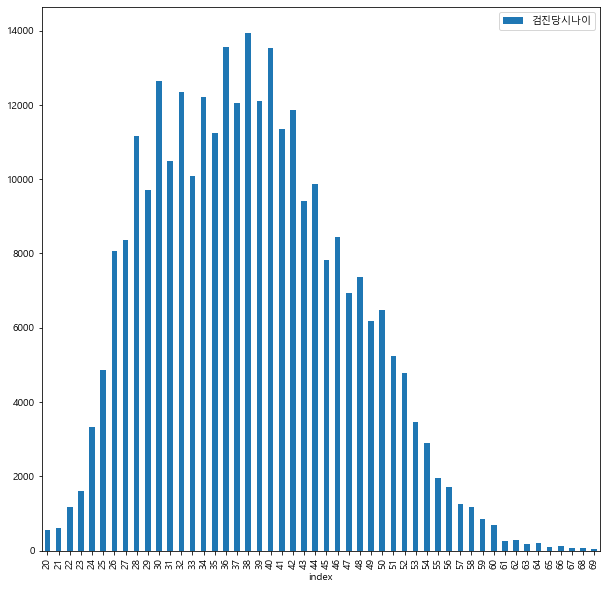

In [315]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [316]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,554
39,21,615
35,22,1184
33,23,1604
29,24,3340
26,25,4849
19,26,8062
18,27,8357
11,28,11169
15,29,9700


# 검진항목 시각화

In [317]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
count,294730.000000,2.947300e+05,2.947300e+05,294730.0,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.0,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000,294730.000000
mean,2021.828066,5.034591e+05,1.518538e+06,2.0,38.207414,19.118302,14.950605,99.015848,16.599766,158.094317,0.724899,0.220104,0.504941,101.018854,0.706266,10.0,15.750503,87.971322,82.932186,80.022021,80.633190,103.086861,111.668211,93.886688,116.391645,99.044397,96.143846,100.635878,101.251801,96.139012,100.831174
std,1.742329,3.698670e+05,8.014092e+05,0.0,8.394876,5.010901,6.913659,35.470507,8.843005,23.120768,0.243588,0.074263,0.178975,16.858670,0.118541,0.0,3.212314,42.566485,42.535797,41.796894,42.776752,57.214500,42.092109,41.001436,45.667480,51.011747,42.439423,54.129321,59.126385,18.088392,10.823359
min,2010.000000,5.300000e+01,3.320000e+02,2.0,20.000000,5.000000,0.000000,80.000000,0.700000,78.000000,0.030000,0.060000,0.000000,43.000000,0.280000,10.0,4.500000,0.030000,0.000000,0.360000,0.000000,0.060000,0.000000,3.290000,0.010000,0.000000,0.000000,0.000000,1.460000,11.160000,50.000000
25%,2021.000000,2.177220e+05,6.836065e+05,2.0,32.000000,16.000000,10.000000,80.000000,11.000000,147.000000,0.600000,0.200000,0.400000,90.000000,0.600000,10.0,14.000000,60.690000,52.120000,31.670000,46.770000,81.040000,99.870000,58.240000,100.000000,48.950000,66.750000,49.690000,41.680000,84.290000,94.000000
50%,2022.000000,3.758415e+05,1.478648e+06,2.0,38.000000,18.000000,13.000000,80.000000,14.000000,157.920000,0.720000,0.220000,0.500000,101.030000,0.700000,10.0,15.780000,96.320000,93.520000,99.870000,93.290000,100.000000,112.970000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,96.220000,101.000000
75%,2023.000000,8.263990e+05,2.210998e+06,2.0,44.000000,22.000000,17.000000,97.000000,19.000000,162.000000,0.800000,0.260000,0.550000,112.000000,0.800000,10.0,17.000000,110.020000,104.800000,101.140000,104.390000,157.390000,144.210000,100.000000,157.970000,146.750000,119.270000,149.270000,161.540000,108.170000,108.000000
max,2024.000000,1.473631e+06,2.871442e+06,2.0,69.000000,40.200000,56.000000,250.000000,72.000000,262.000000,1.800000,0.440000,1.400000,147.000000,1.410000,10.0,24.750000,200.000000,199.990000,199.720000,199.960000,200.000000,199.930000,192.300000,199.530000,199.810000,200.000000,199.980000,200.000000,178.340000,150.000000


<AxesSubplot:xlabel='검진당시나이'>

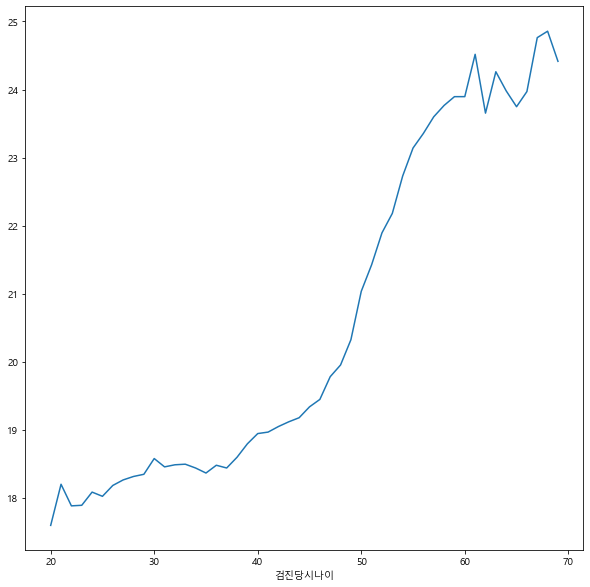

In [318]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

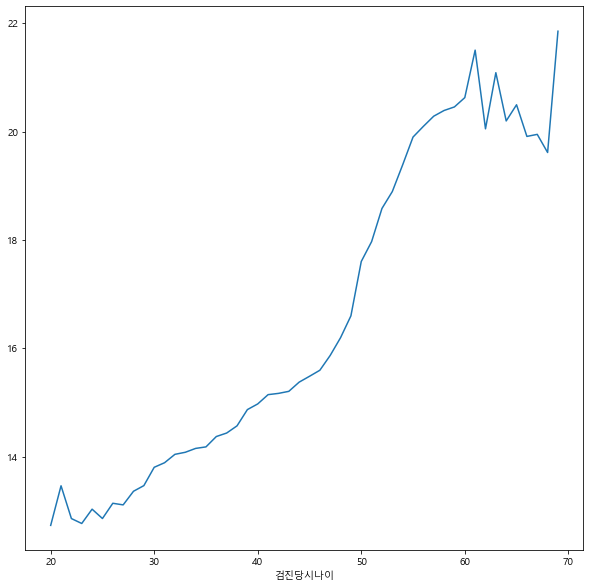

In [319]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

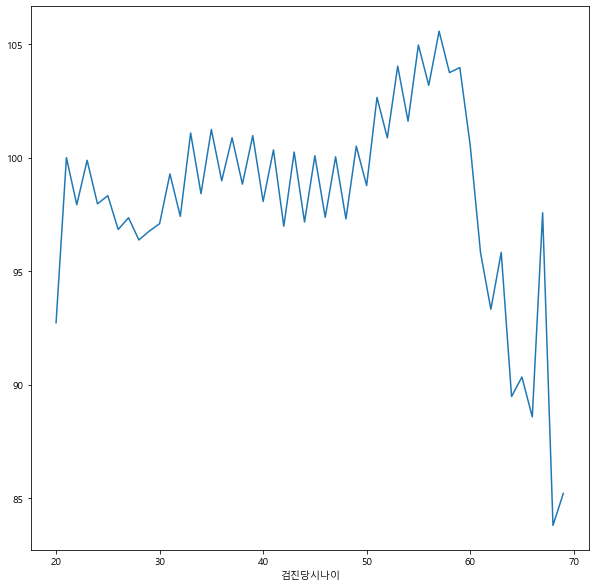

In [320]:
df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

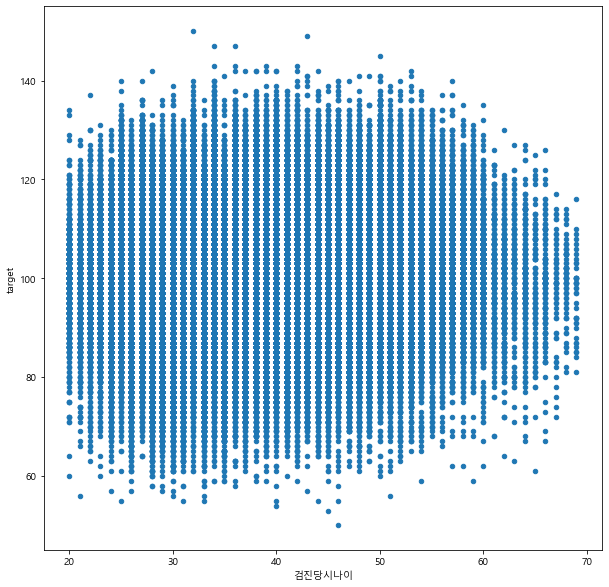

In [321]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

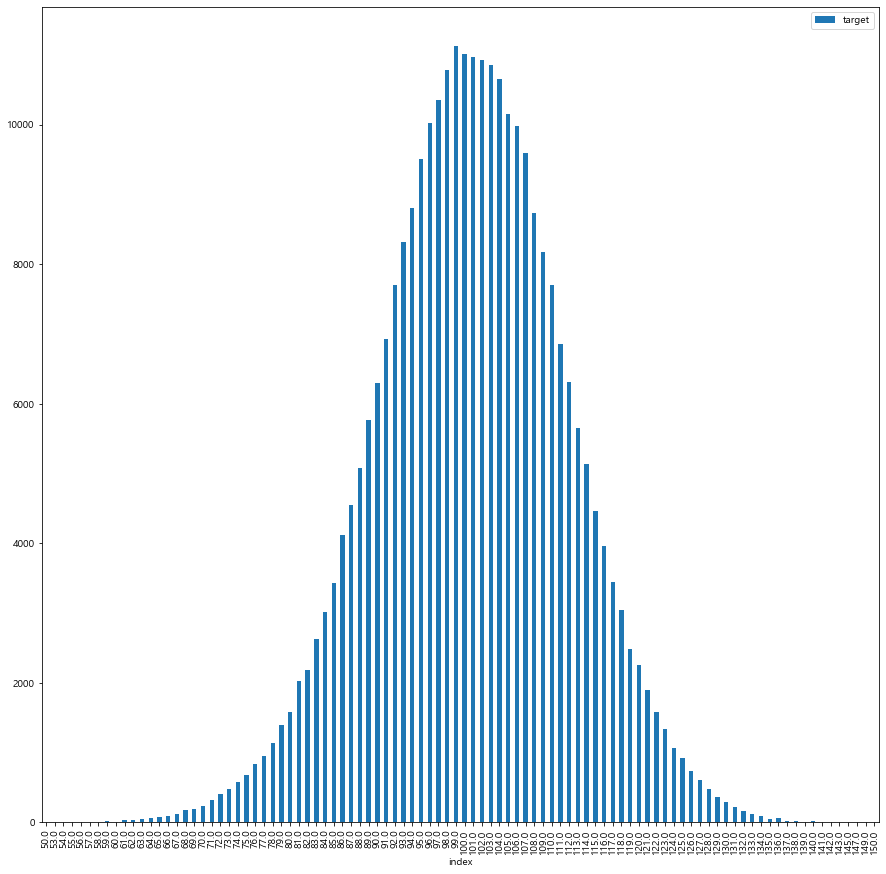

In [322]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [323]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
92,50.0,1
94,53.0,1
93,54.0,1
85,55.0,6
88,56.0,4
86,57.0,5
83,58.0,10
78,59.0,16
81,60.0,11
75,61.0,33


In [324]:
df_woman_sampling = pd.DataFrame()

for target in range(int(df_woman['target'].min()), 100):
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [325]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

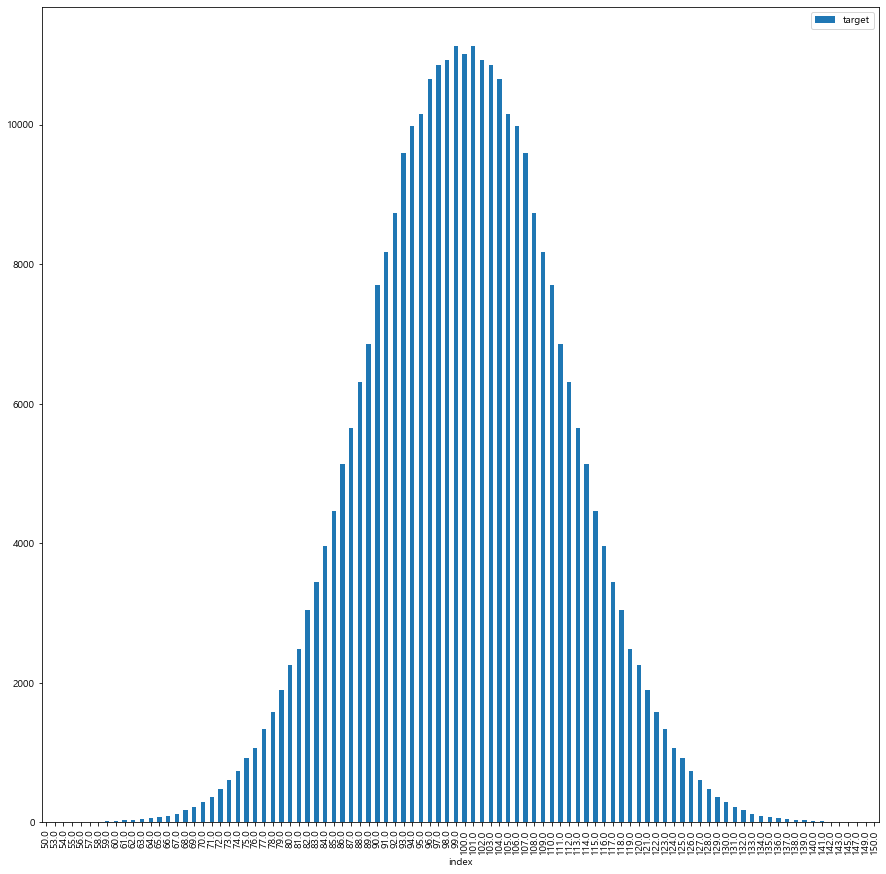

In [326]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [327]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
95,50.0,1
90,53.0,2
94,54.0,1
85,55.0,6
89,56.0,4
88,57.0,5
84,58.0,11
79,59.0,16
81,60.0,15
78,61.0,33


# 나이별 확인하기

In [328]:
# df_woman['검진당시나이'].value_counts()

In [329]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [330]:
# df_woman['검진당시나이'].min()

In [331]:
# df_woman['검진당시나이'].max()

In [332]:
# df_woman.columns

In [333]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [334]:
# df_temp.info()

In [335]:
# df_temp.reset_index(drop=True, inplace=True)

In [336]:
# df_woman = df_temp.copy()

In [337]:
# df_woman['검진당시나이'].value_counts()

In [338]:
# df_woman[df_woman['검진당시나이']==20]

In [339]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [340]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [341]:
train_columns

['AST(SGOT)',
 'ALT(SGPT)',
 'ALP',
 'r-GTP(GGT)',
 '유산탈수소효소 (LDH)',
 '총빌리루빈',
 '직접빌리루빈',
 '간접빌리루빈',
 '신사구체여과율 (GFR)',
 '크레아티닌(Creatinine)',
 '요소질소 (BUN)',
 'B/C 비율']

In [342]:
# target_col = '검진당시나이'

In [343]:
target_col

'target'

## Min Max Scaling

In [344]:
from sklearn.preprocessing import MinMaxScaler

In [345]:
scaling_bool

False

In [346]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [347]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [348]:
# model2 = LinearRegression()

In [349]:
# model2.fit(X_train2, y_train2)

In [350]:
# model2.intercept_

In [351]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [352]:
model2 = XGBRegressor()

In [353]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [354]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [355]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 1897.22 seconds for 10 candidates parameter settings.


In [356]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.3,
 'booster': 'gbtree'}

In [357]:
# best score
random_search.best_score_

-14.341110554082949

In [358]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [359]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [360]:
# model = build_model()

In [361]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [362]:
# model.summary()

In [363]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [364]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [365]:
# plot_history(history)

## pyTorch 신경망

In [366]:
np.shape(X_train)[1]

12

In [367]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
        self.fc2 = nn.Linear(100, 50) #두 번째 레이어
        self.fc3 = nn.Linear(50, 1) #출력 레이어 
#         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
#         self.relu = nn.ReLU()
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #활성화 함수 적용                 
#         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
        x = F.relu(self.fc2(x)) #활성화 함수 적용 
        x = F.relu(self.fc3(x))
#         x = self.fc1(x)
#         x = self.fc2(x)
#         x = self.fc3(x)
#         x = self.relu(x)
        return x

In [368]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [369]:
# epochs = 1000

In [370]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [371]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [372]:
# plt.plot(losses)

## coef 계산

In [373]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [374]:
# df_coef2.columns = ['검사항목', 'coef']

In [375]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [376]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [377]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [378]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [379]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [380]:
# slr2 = LinearRegression()

In [381]:
# slr2.fit(X_train2_poly, y_train2)

In [382]:
# np.shape(X_train2)

In [383]:
# np.shape(X_train2_poly)

In [384]:
# np.shape(X_test2)

In [385]:
# np.shape(X_test2_poly)

In [386]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [387]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [388]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [389]:
# model_path2 = './model/03/11/20/best_estimator2.pkl'

In [390]:
# import pickle
# with open(model_path2,'wb') as f:
#     pickle.dump(model2, f)

In [391]:
# with open(model_path2, 'rb') as f:
#     model2 = pickle.load(f)

In [392]:
# Get predictions
# y_pred2 = model2.predict(X_test2)

# 성능 평가

## pyTorch 예측

In [393]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [394]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [395]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 2.7855339377670267
MSE : 14.221554109245524
RMSE : 3.77114758518485


In [396]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.8844801129691136

In [397]:
model2.score(X_test2, y_test2)

0.8844801129691136

## feature importance

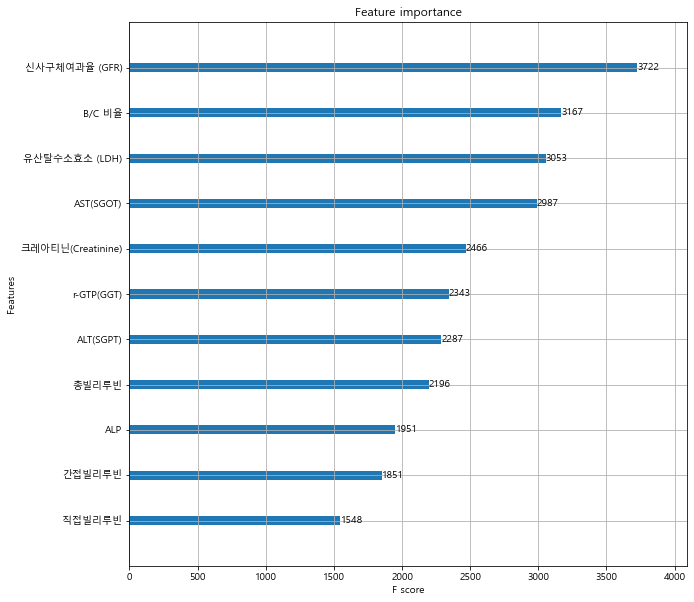

In [398]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2)

# 실제나이 - 예측나이 결과

In [399]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [400]:
df_test2.head()

,target,0
0,92.0,92.530457
1,110.0,111.604301
2,103.0,97.940544
3,105.0,99.746742
4,94.0,99.993904


In [401]:
df_test2.columns

Index(['target', 0], dtype='object')

In [402]:
df_test2.columns = ['실제지수', '예측지수']

In [403]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [404]:
df_test2.head()

,실제지수,예측지수,diff
0,92.0,92.530457,0.530457
1,110.0,111.604301,1.604301
2,103.0,97.940544,-5.059456
3,105.0,99.746742,-5.253258
4,94.0,99.993904,5.993904


In [405]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [406]:
len(df_test2)

78653

In [407]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,92.0,92.530457,0.530457,1.0
1,110.0,111.604301,1.604301,2.0
2,103.0,97.940544,-5.059456,-5.0
3,105.0,99.746742,-5.253258,-5.0
4,94.0,99.993904,5.993904,6.0


<AxesSubplot:>

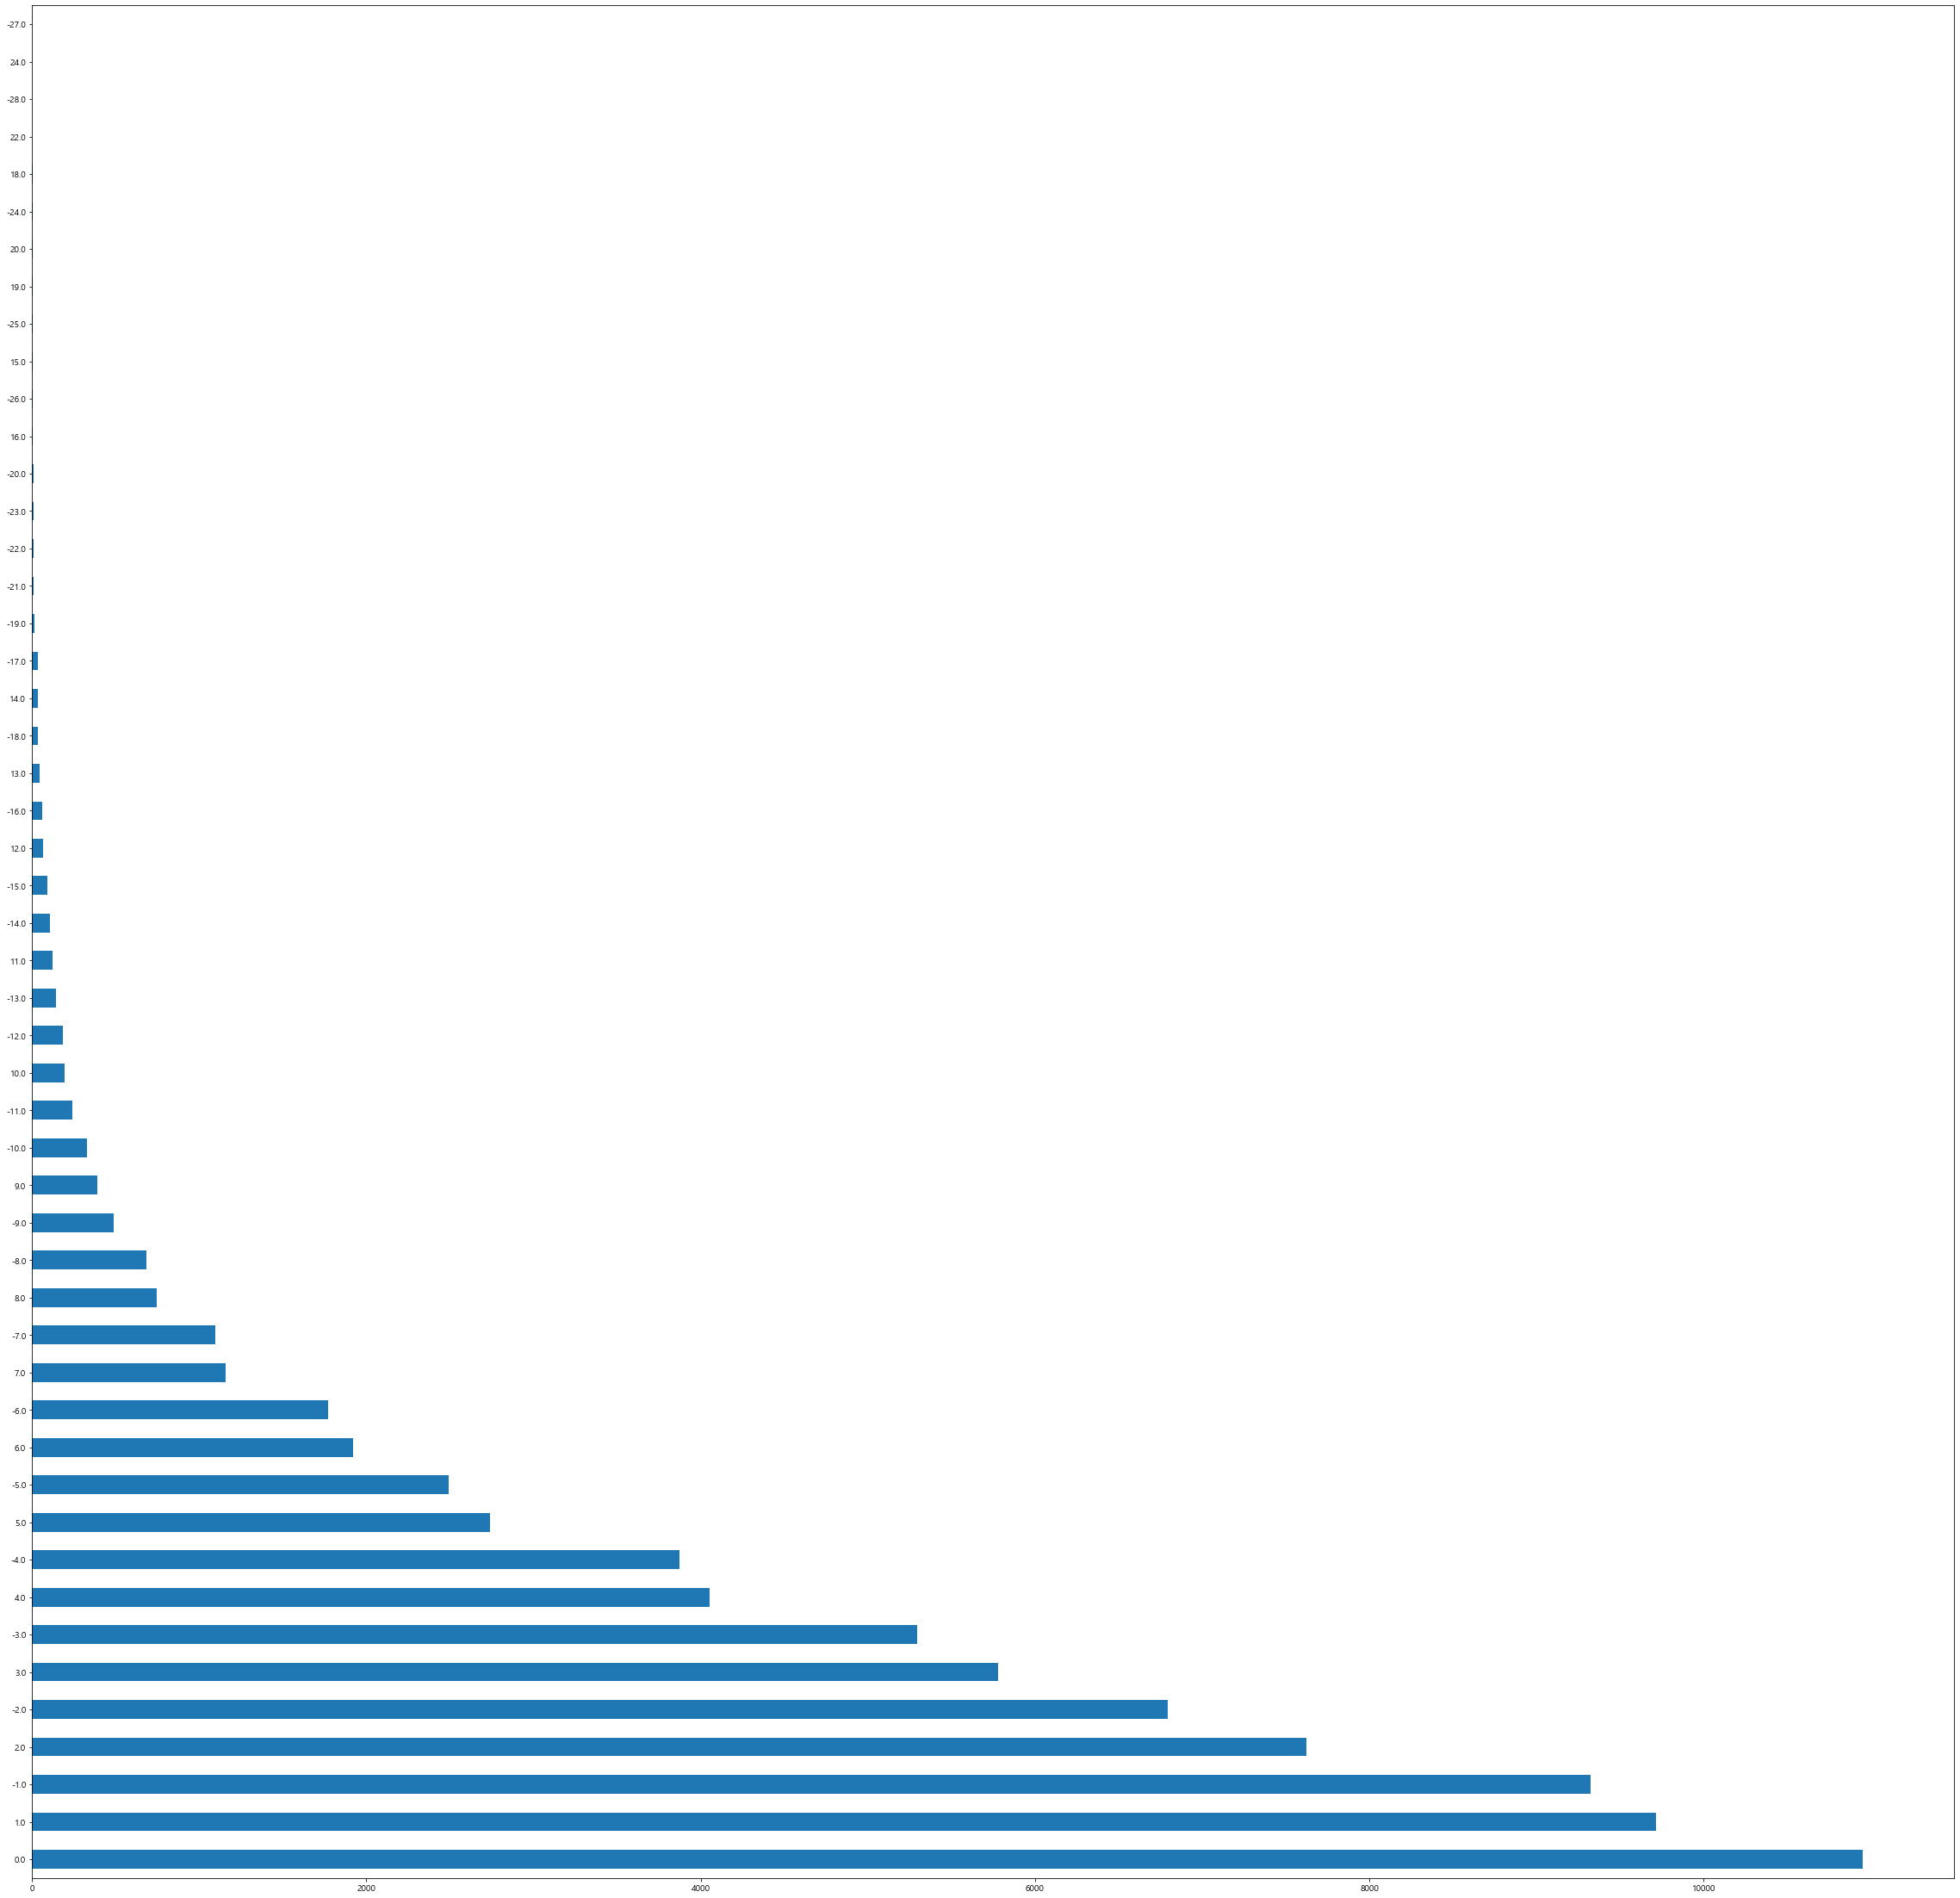

In [408]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [409]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [410]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [411]:
df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [412]:
df_train2.round(0).value_counts()

102.0    8988
99.0     8961
100.0    8921
98.0     8805
101.0    8765
97.0     8522
103.0    8457
96.0     8439
104.0    8275
94.0     8017
95.0     7926
105.0    7891
106.0    7429
93.0     7256
107.0    7198
92.0     6813
108.0    6718
91.0     6340
109.0    6289
90.0     5831
110.0    5634
111.0    5332
89.0     5157
112.0    4716
88.0     4643
87.0     4253
113.0    4087
114.0    3676
86.0     3538
115.0    3270
85.0     3214
116.0    2786
84.0     2739
117.0    2353
83.0     2242
82.0     2020
118.0    2018
119.0    1793
81.0     1711
120.0    1465
80.0     1411
121.0    1263
79.0     1158
122.0     965
78.0      956
77.0      837
123.0     814
76.0      671
124.0     661
75.0      542
125.0     491
74.0      419
73.0      398
126.0     397
127.0     340
128.0     256
72.0      216
129.0     193
71.0      192
70.0      166
130.0     147
69.0      119
131.0     108
132.0      90
68.0       82
66.0       67
67.0       64
134.0      63
133.0      56
64.0       42
135.0      32
65.0  

In [413]:
y_test2.value_counts()

100.0    2792
103.0    2782
101.0    2774
99.0     2774
102.0    2755
98.0     2744
97.0     2717
104.0    2624
96.0     2624
105.0    2532
95.0     2477
94.0     2462
106.0    2448
107.0    2418
93.0     2375
92.0     2181
108.0    2166
91.0     2070
109.0    2025
90.0     2013
110.0    1951
89.0     1724
111.0    1721
112.0    1589
88.0     1539
87.0     1413
113.0    1406
114.0    1292
86.0     1280
115.0    1116
85.0     1106
84.0     1050
116.0    1004
117.0     865
83.0      833
82.0      768
118.0     760
119.0     640
81.0      626
120.0     595
80.0      585
79.0      476
121.0     466
78.0      382
122.0     369
123.0     352
77.0      312
124.0     293
76.0      285
75.0      233
125.0     227
74.0      170
126.0     170
73.0      154
127.0     137
72.0      111
128.0      99
71.0       84
70.0       82
129.0      80
131.0      77
130.0      70
69.0       55
68.0       47
132.0      45
134.0      29
133.0      29
67.0       25
66.0       23
65.0       22
135.0      17
136.0 

In [414]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [415]:
df_plot.columns = ['count']

In [416]:
df_plot.reset_index(inplace=True)

In [417]:
df_plot = df_plot.sort_values('index', ascending=True)

In [418]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

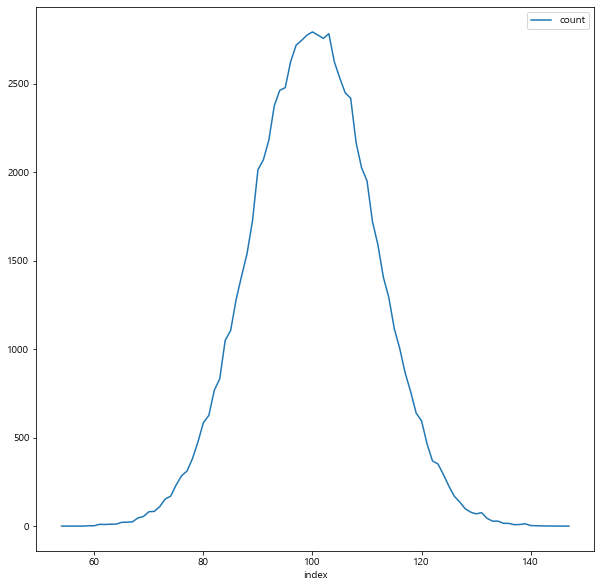

In [419]:
df_plot.plot()

In [420]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [421]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [422]:
df_test2.round(0).value_counts()

102.0    2963
100.0    2962
99.0     2961
98.0     2924
101.0    2917
97.0     2858
103.0    2851
96.0     2772
104.0    2712
94.0     2680
95.0     2658
105.0    2643
106.0    2564
93.0     2449
107.0    2419
92.0     2310
91.0     2148
108.0    2134
109.0    2134
90.0     1945
110.0    1872
89.0     1812
111.0    1689
112.0    1636
88.0     1496
87.0     1470
113.0    1406
86.0     1273
114.0    1202
85.0     1077
115.0     992
116.0     980
84.0      932
118.0     756
83.0      725
117.0     710
82.0      673
119.0     599
81.0      555
120.0     513
80.0      477
79.0      385
121.0     360
122.0     311
78.0      310
123.0     258
77.0      251
124.0     229
76.0      218
75.0      186
125.0     167
74.0      125
126.0     112
73.0      110
127.0     101
128.0      89
71.0       71
72.0       69
70.0       59
129.0      58
130.0      46
131.0      37
68.0       32
69.0       27
132.0      23
67.0       23
133.0      20
134.0      18
66.0       13
136.0      12
65.0       12
64.0  

In [423]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [424]:
df_plot2.columns = ['count']

In [425]:
df_plot2.reset_index(inplace=True)

In [426]:
df_plot2

,0,count
0,102.0,2963
1,100.0,2962
2,99.0,2961
3,98.0,2924
4,101.0,2917
5,97.0,2858
6,103.0,2851
7,96.0,2772
8,104.0,2712
9,94.0,2680


In [427]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [428]:
df_plot2.set_index(0, inplace=True)

In [429]:
df_plot2

,count
0,
55.0,1
57.0,1
59.0,1
60.0,2
61.0,5
62.0,5
63.0,8
64.0,12
65.0,12


<AxesSubplot:xlabel='0'>

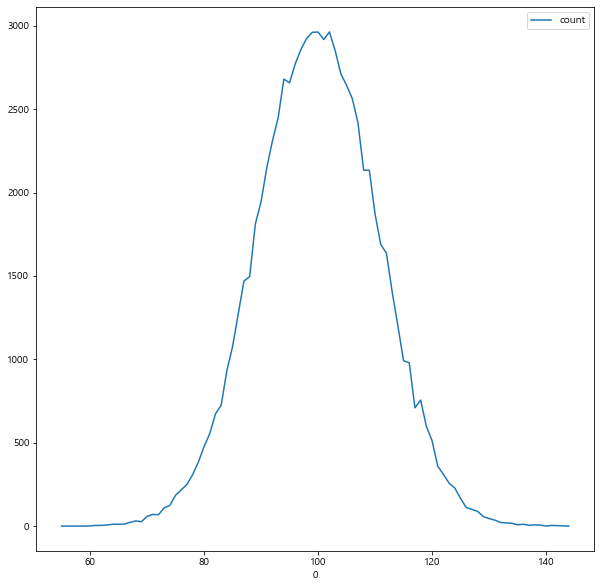

In [430]:
df_plot2.plot()

# 시각화

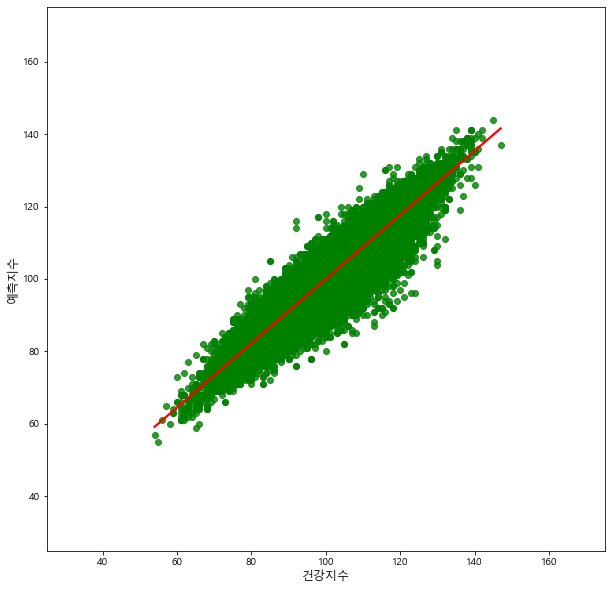

In [431]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [432]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
0,2023,53,2632764,2,28,19.0,15.0,83.04,12.0,157.92,0.72,0.22,0.50,118.00,0.60,10.0,15.78,80.57,59.47,100.00,100.00,100.00,100.00,100.00,100.00,150.94,114.61,100.00,100.00,100.47,103.0
1,2024,53,2658222,2,29,16.0,9.0,80.00,10.0,172.00,0.50,0.20,0.30,130.00,0.50,10.0,16.70,102.04,114.43,96.12,113.95,11.38,146.50,100.00,54.10,177.45,180.14,156.54,30.09,106.90,107.0
2,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.00,0.76,0.07,0.69,102.73,0.71,10.0,15.78,104.83,90.26,82.80,137.55,181.13,144.68,180.07,31.17,95.40,92.93,163.03,100.00,116.99,113.0
3,2022,54,1319859,2,32,15.0,12.0,244.00,15.0,137.00,0.80,0.20,0.60,88.00,0.80,10.0,19.00,111.61,97.78,0.97,78.34,177.11,152.92,100.00,161.69,48.43,73.35,10.10,17.20,85.79,95.0
4,2023,54,2039511,2,33,16.0,13.0,207.00,13.0,135.00,0.70,0.10,0.60,102.00,0.70,10.0,14.00,106.16,89.80,4.45,96.28,163.65,92.05,164.74,65.44,98.93,100.00,128.04,135.52,103.76,105.0


In [433]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294730 entries, 0 to 294729
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   검진년도                   294730 non-null  int64  
 1   UID                    294730 non-null  int64  
 2   CU_REC_ID              294730 non-null  int64  
 3   SEX                    294730 non-null  int64  
 4   검진당시나이                 294730 non-null  int64  
 5   AST(SGOT)              294730 non-null  float64
 6   ALT(SGPT)              294730 non-null  float64
 7   ALP                    294730 non-null  float64
 8   r-GTP(GGT)             294730 non-null  float64
 9   유산탈수소효소 (LDH)          294730 non-null  float64
 10  총빌리루빈                  294730 non-null  float64
 11  직접빌리루빈                 294730 non-null  float64
 12  간접빌리루빈                 294730 non-null  float64
 13  신사구체여과율 (GFR)          294730 non-null  float64
 14  크레아티닌(Creatinine)      294730 non-nu

In [434]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
62169,2021,196909,2495703,2,28,18.0,9.0,80.0,11.0,150.0,0.8,0.3,0.5,119.0,0.6,10.0,15.7,93.44,114.55,109.90,105.08,124.16,156.83,56.91,100.00,147.02,114.61,161.16,69.55,112.77,111.0
62170,2023,196909,2495700,2,30,18.0,18.0,80.0,13.0,127.0,0.6,0.3,0.3,99.0,0.7,10.0,15.3,100.00,32.44,134.62,96.45,183.88,140.19,49.42,45.42,63.09,100.00,110.41,93.51,95.79,101.0
62171,2024,196909,2495697,2,31,15.0,8.0,80.0,10.0,149.0,1.0,0.4,0.6,123.0,0.6,10.0,18.8,114.26,135.36,100.63,113.15,115.02,99.87,16.78,59.23,147.18,118.43,105.60,24.18,95.81,101.0


In [435]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [436]:
len(df_pred2)

294730

In [437]:
df_pred2.reset_index(drop=True, inplace=True)

In [438]:
X_test2

,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율
93226,17.0,13.0,80.00,32.0,179.00,1.00,0.40,0.60,127.00,0.60,10.0,15.78
211601,14.0,10.0,130.00,13.0,149.00,0.70,0.20,0.40,107.00,0.70,10.0,12.00
151963,26.0,11.0,83.04,13.0,157.92,0.72,0.22,0.50,102.00,0.70,10.0,15.78
285905,16.0,6.0,80.00,10.0,157.92,1.00,0.30,0.70,84.00,0.90,10.0,13.30
112147,19.0,11.0,80.00,11.0,119.00,1.50,0.40,1.10,102.00,0.70,10.0,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...
99759,15.0,11.0,173.00,18.0,157.92,0.76,0.16,0.60,85.00,0.80,10.0,8.50
226415,17.0,7.0,83.04,9.0,157.92,0.57,0.22,0.50,105.00,0.70,10.0,15.78
144875,19.0,11.0,80.00,14.0,181.00,0.77,0.22,0.60,74.00,0.87,10.0,20.00
71815,18.0,15.0,80.00,15.0,157.92,0.50,0.20,0.30,101.03,0.70,10.0,14.30


In [439]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'AST(SGOT)', 'ALT(SGPT)',
       'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', '총빌리루빈', '직접빌리루빈', '간접빌리루빈',
       '신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', 'B/C 비율',
       'AST(SGOT)_kde', 'ALT(SGPT)_kde', 'ALP_kde', 'r-GTP(GGT)_kde',
       '유산탈수소효소 (LDH)_kde', '총빌리루빈_kde', '직접빌리루빈_kde', '간접빌리루빈_kde',
       '신사구체여과율 (GFR)_kde', '크레아티닌(Creatinine)_kde', '요소질소 (BUN)_kde',
       'B/C 비율_kde', 'kde_mean', 'target'],
      dtype='object')

In [440]:
df_pred2[train_columns]

,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율
0,19.0,15.0,83.04,12.0,157.92,0.72,0.22,0.50,118.00,0.60,10.0,15.78
1,16.0,9.0,80.00,10.0,172.00,0.50,0.20,0.30,130.00,0.50,10.0,16.70
2,16.0,13.0,84.00,9.0,130.00,0.76,0.07,0.69,102.73,0.71,10.0,15.78
3,15.0,12.0,244.00,15.0,137.00,0.80,0.20,0.60,88.00,0.80,10.0,19.00
4,16.0,13.0,207.00,13.0,135.00,0.70,0.10,0.60,102.00,0.70,10.0,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...
294725,29.0,25.0,83.04,18.0,157.92,0.72,0.22,0.50,99.00,0.60,10.0,15.78
294726,24.0,16.0,83.04,19.0,157.92,0.72,0.22,0.50,98.00,0.60,10.0,15.78
294727,21.0,12.0,80.00,16.0,191.00,0.40,0.10,0.30,102.00,0.60,10.0,17.70
294728,29.0,27.0,83.04,14.0,157.92,0.72,0.22,0.50,122.00,0.60,10.0,15.78


In [441]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [442]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [443]:
pred_data2

array([103.77888 , 113.2232  , 113.740616, ..., 112.55377 ,  95.50671 ,
        99.828064], dtype=float32)

In [444]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [445]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [446]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target,예측지수
0,2023,53,2632764,2,28,19.0,15.0,83.04,12.0,157.92,0.72,0.22,0.50,118.00,0.60,10.0,15.78,80.57,59.47,100.00,100.00,100.00,100.00,100.00,100.00,150.94,114.61,100.00,100.00,100.47,103.0,103.778877
1,2024,53,2658222,2,29,16.0,9.0,80.00,10.0,172.00,0.50,0.20,0.30,130.00,0.50,10.0,16.70,102.04,114.43,96.12,113.95,11.38,146.50,100.00,54.10,177.45,180.14,156.54,30.09,106.90,107.0,113.223198
2,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.00,0.76,0.07,0.69,102.73,0.71,10.0,15.78,104.83,90.26,82.80,137.55,181.13,144.68,180.07,31.17,95.40,92.93,163.03,100.00,116.99,113.0,113.740616
3,2022,54,1319859,2,32,15.0,12.0,244.00,15.0,137.00,0.80,0.20,0.60,88.00,0.80,10.0,19.00,111.61,97.78,0.97,78.34,177.11,152.92,100.00,161.69,48.43,73.35,10.10,17.20,85.79,95.0,93.010239
4,2023,54,2039511,2,33,16.0,13.0,207.00,13.0,135.00,0.70,0.10,0.60,102.00,0.70,10.0,14.00,106.16,89.80,4.45,96.28,163.65,92.05,164.74,65.44,98.93,100.00,128.04,135.52,103.76,105.0,107.494911
5,2024,54,2750990,2,34,24.0,22.0,80.00,12.0,156.00,0.82,0.14,0.68,96.19,0.80,10.0,15.78,24.74,16.19,69.33,100.00,91.95,155.82,164.26,171.56,59.94,68.14,159.11,100.00,98.42,102.0,96.664726
6,2019,56,1605927,2,30,17.0,10.0,83.04,15.0,157.92,0.72,0.22,0.50,89.00,0.80,10.0,15.78,100.24,103.91,100.00,77.47,100.00,100.00,100.00,100.00,47.95,73.93,100.00,100.00,91.96,98.0,98.368095
7,2020,56,1605928,2,31,17.0,9.0,83.04,15.0,157.92,0.72,0.22,0.50,143.00,0.50,10.0,15.78,100.00,116.92,100.00,74.26,100.00,100.00,100.00,100.00,188.94,176.87,100.00,100.00,113.08,111.0,111.617874
8,2021,56,1605929,2,32,14.0,8.0,83.04,15.0,157.92,0.72,0.22,0.50,142.00,0.50,10.0,15.78,132.23,138.60,100.00,78.34,100.00,100.00,100.00,100.00,191.07,182.10,100.00,100.00,118.53,114.0,115.157822
9,2022,56,1351361,2,33,15.0,7.0,80.00,12.0,157.92,1.10,0.30,0.80,115.00,0.60,10.0,15.00,119.79,158.79,151.04,100.00,100.00,36.15,49.19,26.77,148.20,119.08,140.83,100.00,104.15,106.0,110.629501


## 예측지수 성능평가

In [447]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

2.766338376630349

# target으로 나이 계산

In [448]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [449]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target,예측지수,예측나이
0,2023,53,2632764,2,28,19.0,15.0,83.04,12.0,157.92,0.72,0.22,0.50,118.00,0.60,10.0,15.78,80.57,59.47,100.00,100.00,100.00,100.00,100.00,100.00,150.94,114.61,100.00,100.00,100.47,103.0,103.778877,27.24
1,2024,53,2658222,2,29,16.0,9.0,80.00,10.0,172.00,0.50,0.20,0.30,130.00,0.50,10.0,16.70,102.04,114.43,96.12,113.95,11.38,146.50,100.00,54.10,177.45,180.14,156.54,30.09,106.90,107.0,113.223198,26.36
2,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.00,0.76,0.07,0.69,102.73,0.71,10.0,15.78,104.83,90.26,82.80,137.55,181.13,144.68,180.07,31.17,95.40,92.93,163.03,100.00,116.99,113.0,113.740616,27.25
3,2022,54,1319859,2,32,15.0,12.0,244.00,15.0,137.00,0.80,0.20,0.60,88.00,0.80,10.0,19.00,111.61,97.78,0.97,78.34,177.11,152.92,100.00,161.69,48.43,73.35,10.10,17.20,85.79,95.0,93.010239,33.40
4,2023,54,2039511,2,33,16.0,13.0,207.00,13.0,135.00,0.70,0.10,0.60,102.00,0.70,10.0,14.00,106.16,89.80,4.45,96.28,163.65,92.05,164.74,65.44,98.93,100.00,128.04,135.52,103.76,105.0,107.494911,31.50
5,2024,54,2750990,2,34,24.0,22.0,80.00,12.0,156.00,0.82,0.14,0.68,96.19,0.80,10.0,15.78,24.74,16.19,69.33,100.00,91.95,155.82,164.26,171.56,59.94,68.14,159.11,100.00,98.42,102.0,96.664726,34.67
6,2019,56,1605927,2,30,17.0,10.0,83.04,15.0,157.92,0.72,0.22,0.50,89.00,0.80,10.0,15.78,100.24,103.91,100.00,77.47,100.00,100.00,100.00,100.00,47.95,73.93,100.00,100.00,91.96,98.0,98.368095,30.33
7,2020,56,1605928,2,31,17.0,9.0,83.04,15.0,157.92,0.72,0.22,0.50,143.00,0.50,10.0,15.78,100.00,116.92,100.00,74.26,100.00,100.00,100.00,100.00,188.94,176.87,100.00,100.00,113.08,111.0,111.617874,28.68
8,2021,56,1605929,2,32,14.0,8.0,83.04,15.0,157.92,0.72,0.22,0.50,142.00,0.50,10.0,15.78,132.23,138.60,100.00,78.34,100.00,100.00,100.00,100.00,191.07,182.10,100.00,100.00,118.53,114.0,115.157822,28.97
9,2022,56,1351361,2,33,15.0,7.0,80.00,12.0,157.92,1.10,0.30,0.80,115.00,0.60,10.0,15.00,119.79,158.79,151.04,100.00,100.00,36.15,49.19,26.77,148.20,119.08,140.83,100.00,104.15,106.0,110.629501,30.87


## 예측나이 성능평가

In [450]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

1.6259971838631968

# 최종 산출

In [451]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target,예측지수,예측나이
0,2023,53,2632764,2,28,19.0,15.0,83.04,12.0,157.92,0.72,0.22,0.50,118.00,0.60,10.0,15.78,80.57,59.47,100.00,100.00,100.00,100.00,100.00,100.00,150.94,114.61,100.00,100.00,100.47,103.0,103.778877,27.24
1,2024,53,2658222,2,29,16.0,9.0,80.00,10.0,172.00,0.50,0.20,0.30,130.00,0.50,10.0,16.70,102.04,114.43,96.12,113.95,11.38,146.50,100.00,54.10,177.45,180.14,156.54,30.09,106.90,107.0,113.223198,26.36
2,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.00,0.76,0.07,0.69,102.73,0.71,10.0,15.78,104.83,90.26,82.80,137.55,181.13,144.68,180.07,31.17,95.40,92.93,163.03,100.00,116.99,113.0,113.740616,27.25
3,2022,54,1319859,2,32,15.0,12.0,244.00,15.0,137.00,0.80,0.20,0.60,88.00,0.80,10.0,19.00,111.61,97.78,0.97,78.34,177.11,152.92,100.00,161.69,48.43,73.35,10.10,17.20,85.79,95.0,93.010239,33.40
4,2023,54,2039511,2,33,16.0,13.0,207.00,13.0,135.00,0.70,0.10,0.60,102.00,0.70,10.0,14.00,106.16,89.80,4.45,96.28,163.65,92.05,164.74,65.44,98.93,100.00,128.04,135.52,103.76,105.0,107.494911,31.50


In [452]:
# df_output2.to_csv('woman.csv')

# 최종 UID별 확인

In [453]:
# 성..
df_output2[df_output2['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target,예측지수,예측나이
91784,2021,261581,2418910,2,50,24.0,23.0,80.0,18.0,177.0,0.7,0.2,0.5,106.0,0.6,10.0,13.9,61.71,33.67,117.65,70.12,29.45,129.13,100.00,163.46,155.22,127.26,170.95,183.92,111.88,110.0,104.354202,49.13
91785,2023,261581,2243877,2,52,27.0,24.0,80.0,18.0,177.0,0.9,0.3,0.6,105.0,0.6,10.0,11.0,44.95,45.03,110.66,77.84,54.41,150.21,46.12,171.31,152.29,125.58,193.24,194.06,113.81,111.0,105.661659,50.87
91786,2024,261581,2418911,2,53,17.0,13.0,80.0,17.0,162.0,0.8,0.3,0.5,104.0,0.6,10.0,20.8,125.50,108.51,102.60,86.90,169.50,76.42,50.84,149.42,151.53,124.00,90.43,17.66,104.44,106.0,107.795029,51.44


In [454]:
# 차..
df_output2[df_output2['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target,예측지수,예측나이
186511,2022,477944,2212776,2,31,19.0,11.0,80.0,24.0,120.0,0.7,0.3,0.4,117.0,0.6,10.0,18.9,83.71,100.07,150.94,14.71,183.47,114.59,51.87,83.71,149.40,118.43,79.91,23.70,96.21,101.0,98.625473,31.27
186512,2023,477944,2212775,2,32,12.0,9.0,80.0,23.0,121.0,1.0,0.4,0.6,97.0,0.7,10.0,19.6,173.30,120.29,153.84,18.20,189.11,100.00,18.82,161.69,61.51,100.00,17.72,14.50,94.08,100.0,98.513283,32.30
186513,2024,477944,2362855,2,33,20.0,16.0,80.0,22.0,123.0,0.7,0.3,0.4,84.0,0.9,10.0,16.1,62.89,56.62,130.28,16.98,180.48,92.05,49.19,90.02,31.93,28.03,26.82,58.68,68.66,84.0,86.512634,35.70


In [455]:
# df_output2.to_excel('./output/소화기능나이_여자.xlsx')
# df_output2.to_csv('./output/03_숙취나이_결측치제거_20대_여자.csv')

# 임의값 테스트

In [456]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
count,401342.000000,4.013420e+05,4.013420e+05,401342.0,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.0,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000,401342.000000
mean,2021.913929,5.213773e+05,1.548328e+06,1.0,41.592632,22.638785,24.661158,107.685693,29.553032,164.044926,0.874740,0.257355,0.614324,92.678065,0.964241,10.0,13.893990,88.698721,82.216736,83.004535,78.022482,102.508629,110.021305,89.862400,137.531402,100.885157,97.797486,98.340965,103.769941,97.721651,101.777656
std,1.736331,3.706953e+05,8.003608e+05,0.0,8.955110,5.671779,10.165410,43.932887,13.992056,21.965712,0.263237,0.074266,0.189747,14.637981,0.142178,0.0,2.739114,40.228686,39.740683,41.768770,38.879974,58.936523,50.042100,32.737551,40.271149,53.380768,41.399232,54.886764,59.216559,17.663918,10.569247
min,2010.000000,6.200000e+01,2.530000e+02,1.0,20.000000,5.000000,1.000000,80.000000,1.000000,78.000000,0.000000,0.060000,-0.200000,47.000000,0.420000,10.0,4.500000,0.280000,1.140000,0.520000,0.930000,0.060000,0.120000,7.520000,0.210000,0.020000,0.160000,1.060000,0.090000,17.920000,54.000000
25%,2021.000000,2.246930e+05,7.028815e+05,1.0,34.000000,19.000000,17.000000,80.000000,19.000000,153.000000,0.700000,0.200000,0.500000,83.000000,0.880000,10.0,12.292500,61.030000,51.090000,62.560000,44.840000,65.410000,99.730000,76.740000,100.000000,50.732500,64.370000,44.290000,50.780000,85.990000,95.000000
50%,2022.000000,3.878610e+05,1.555204e+06,1.0,41.000000,22.000000,23.000000,82.000000,26.000000,163.950000,0.870000,0.260000,0.610000,92.560000,0.970000,10.0,13.900000,97.200000,90.440000,100.000000,86.720000,100.000000,120.790000,100.000000,158.230000,100.000000,100.000000,100.000000,100.000000,97.620000,102.000000
75%,2023.000000,8.505768e+05,2.262382e+06,1.0,49.000000,26.000000,30.000000,99.000000,37.000000,169.000000,1.000000,0.300000,0.690000,101.000000,1.070000,10.0,15.000000,107.110000,102.140000,104.190000,101.020000,163.050000,149.180000,100.000000,169.100000,157.850000,128.190000,147.640000,164.390000,109.480000,109.000000
max,2024.000000,1.473645e+06,2.871445e+06,1.0,69.000000,40.200000,56.500000,250.000000,72.500000,262.000000,1.800000,0.440000,1.400000,147.000000,1.450000,10.0,24.750000,200.000000,199.980000,199.610000,199.820000,200.000000,200.000000,194.820000,200.000000,200.000000,200.000000,200.000000,200.000000,171.040000,146.000000


In [457]:
df_man[:1]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),총빌리루빈,직접빌리루빈,간접빌리루빈,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),B/C 비율,AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,총빌리루빈_kde,직접빌리루빈_kde,간접빌리루빈_kde,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,B/C 비율_kde,kde_mean,target
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.0,0.97,0.2,0.77,87.0,1.0,10.0,13.8,79.46,34.36,20.48,86.24,156.5,105.45,100.0,177.62,66.34,100.0,54.33,103.85,90.39,97.0


In [458]:
# df_outlier = pd.DataFrame(
#     [[1.2, 1.2, 1.2, 1.3, 1.3, 1.2, 1.2, 1.2]],
#     columns=train_columns)

In [459]:
# model.predict(df_outlier)

In [460]:
# df_outlier2 = pd.DataFrame(
# #     [[524, 537, 168, 525, 156, 3, 0.2, 0.77]],
#     [[23, 21, 44, 20, 170, 1, 0.17, 0.4]],
#     columns=train_columns)

In [461]:
# model.predict(df_outlier)

In [462]:
# model.coef_

In [463]:
# (model.coef_[0] * 24) + (model.coef_[1] * 37) + (model.coef_[2] * 168) + (model.coef_[3] * 25) + (model.coef_[4] * 156) + (model.coef_[5] * 0.97) + (model.coef_[6] * 0.2) + (model.coef_[7] * 0.77) + model.intercept_